In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table, join, Column, conf, vstack
from cmdstanpy import CmdStanModel
import smplotlib
conf.max_lines = 200


### TABLE FORMATING

In [2]:
agora_mw = Table.read("DwarfProperties/Agora/Main_galaxy_z0.csv")
agora_satellites = Table.read("DwarfProperties/Agora/ARRAKIHS_Infall_Satellites.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'DwarfProperties/Agora/Main_galaxy_z0.csv'

In [297]:
tab1 = Table.read("DwarfProperties/LocalGroup/McConnachie2012_Tab1.csv")
tab2 = Table.read("DwarfProperties/LocalGroup/McConnachie2012_Tab2.csv")
tab3 = Table.read("DwarfProperties/LocalGroup/McConnachie2012_Tab3.csv")
tab4 = Table.read("DwarfProperties/LocalGroup/McConnachie2012_Tab4.csv")

In [53]:
mask = ~tab4['Mdyn'].mask

tab_properties = Table()
tab_properties['SubG'] = tab1['SubG'][mask]
tab_properties['Name'] = tab1['Name'][mask]
tab_properties['RAJ2000'] = tab1['RAJ2000'][mask]
tab_properties['DEJ2000'] = tab1['DEJ2000'][mask]

tab_properties['VMag'] = tab3['VMag'][mask]
tab_properties['e_VMag'] = tab3['e_VMag'][mask]
tab_properties['E_VMag'] = tab3['E_VMag'][mask]

tab_properties['R2'] = tab3['R2'][mask]
tab_properties['e_R2'] = tab3['e_R2'][mask]
tab_properties['E_R2'] = tab3['E_R2'][mask]

tab_properties['sigma*'] = tab4['sigma*'][mask]
tab_properties['e_sigma*'] = tab4['e_sigma*'][mask]
tab_properties['E_sigma*'] = tab4['E_sigma*'][mask]

tab_properties['Mdyn'] = tab4['Mdyn'][mask]

ascii.write(tab_properties, "McConnachie_properties.dat", delimiter="\t", overwrite=True)

In [69]:
from astropy.io import ascii
solo_dwarfs = ascii.read("DwarfProperties/LocalGroup/SoloDwarfs_IV.dat", delimiter="\t", fill_values=[('-', 'NaN')]); solo_dwarfs.sort("Name"); solo_dwarfs['McConnCrossmatch'] = [False for _ in range(44)]

In [72]:
mccon = ascii.read("DwarfProperties/LocalGroup/McConnachie_properties.dat", delimiter="\t"); mccon.sort("Name"); mccon['SoloCrossmatch'] = [False for _ in range(44)]; mccon['SubG'] = ["ISO" if sub=="Rest" else sub for sub in mccon['SubG']]

In [108]:
sub = "ISO"

In [109]:
mccon[mccon['SubG'] == sub].pprint(max_lines=50, max_width=500)

SubG             Name                  RAJ2000             DEJ2000        VMag e_VMag E_VMag  R2  e_R2 E_R2 sigma* e_sigma* E_sigma*  Mdyn SoloCrossmatch
---- --------------------------- ------------------- ------------------- ----- ------ ------ ---- ---- ---- ------ -------- -------- ----- --------------
 ISO                       Cetus  6.5458333333333325 -11.044444444444443 -11.2    0.2    0.2  703   31   31   17.0      2.0      2.0 120.0           True
 ISO                       Leo A  149.86041666666665  30.746388888888884 -12.1    0.2    0.2  499   --   --    9.3      1.3      1.3  25.0           True
 ISO                       Leo T  143.72249999999997  17.051388888888887  -8.0    0.5    0.5  120    9    9    7.5      1.6      1.6   3.9           True
 ISO                      Tucana   340.4566666666666  -64.41944444444444  -9.5    0.2    0.2  284   54   54   15.8      3.1      4.1  41.0           True
 ISO WLM (Wolf-Lundmark-Melotte) 0.49249999999999994 -15.460833333333332 -14

In [116]:
solo_dwarfs[solo_dwarfs['SubG'] == 'ISO'].pprint(max_lines=50, max_width=500)

SubG    Name         RA         DEC      (m-M) e_(m-M) E_(m-M)  e   de-  de+  mu_vo e_mu_vo E_mu_vo sigma e_sigma E_sigma   MV   e_MV E_MV  n   e_n    rs    e_rs  E_rs  Mdyn e_Mdyn E_Mdyn   ML   e_ML  E_ML Dmin McConnCrossmatch
---- ---------- ----------- ------------ ----- ------- ------- ---- ---- ---- ----- ------- ------- ----- ------- ------- ------ ---- ---- ---- ---- ------ ------ ---- ----- ------ ------ ----- ----- ----- ---- ----------------
 ISO  And XVIII 00h02m14.5s +45d05m20.0s 25.36    0.08    0.08 0.44 0.12 0.12  23.5     0.7     0.7   9.7     2.3     2.3  -10.9  0.3  0.3 0.95  0.1  316.0   22.0 22.0  27.0   12.0   15.0  28.0  13.0  20.0  424            False
 ISO And XXVIII 22h32m41.2s +31d12m58.0s 24.44    0.04    0.04 0.42 0.06 0.06  25.5     0.9     0.9   6.6     2.1     2.9   -9.1  0.5  0.5 0.84 0.13  316.0   22.0 22.0  12.6    8.0   11.0  61.0  43.0  92.0  374            False
 ISO And XXXIII 03h01m23.6s +40d59m18.0s 24.18    0.09    0.11 0.04 0.08 0.08  26.0     

In [101]:
SoloCrossmatch = [
    True, True, True, True, True
]
mccon['SoloCrossmatch'][mccon['SubG'] == sub] = SoloCrossmatch

In [115]:
McConnCrossmatch = [
    False, False, False, False, True, False, True, True, False,False, False, False, True, False, True
]
solo_dwarfs['McConnCrossmatch'][solo_dwarfs['SubG'] == sub] = McConnCrossmatch

In [135]:
from astropy import units as u
from astropy.coordinates import SkyCoord

ra_C = []
dec_C = []

for ra, dec in zip(mccon['RAJ2000'].value, mccon['DEJ2000'].value):
    
    c = SkyCoord(ra, dec, unit="deg", frame="icrs")
    rahms, decdms = c.to_string('hmsdms').split(" ")

    ra_C.append(rahms)
    dec_C.append(decdms)

mccon['RA'] = ra_C
mccon['DEC'] = dec_C

In [276]:
mccon[:].pprint(max_lines=50, max_width=500)

SubG              Name                  RA        DEC      VMag e_VMag E_VMag  R2  e_R2 E_R2 sigma* e_sigma* E_sigma*  Mdyn SoloCrossmatch       RAJ2000             DEJ2000                LTot        
---- ----------------------------- ----------- ---------- ----- ------ ------ ---- ---- ---- ------ -------- -------- ----- -------------- ------------------- ------------------- ---------------------
 M31                   Andromeda I 00h45m39.8s +38d02m28s -11.7    0.1    0.1  672   69   69   10.6      1.1      1.1  44.0           True  11.415833333333332   38.04111111111111    3.7670379898390856
 M31                  Andromeda II 01h16m29.8s +33d25m09s -12.4    0.2    0.2 1176   50   50    7.3      0.8      0.8  36.0           True  19.124166666666664   33.41916666666666      7.17794291271363
 M31                 Andromeda III 00h35m33.8s +36d29m52s -10.0    0.3    0.3  479   46   46    4.7      1.8      1.8   6.1           True   8.890833333333331   36.49777777777777    0.787045789695

In [118]:
solo_dwarfs[:].pprint(max_lines=50, max_width=500)

SubG    Name         RA         DEC      (m-M) e_(m-M) E_(m-M)  e   de-  de+  mu_vo e_mu_vo E_mu_vo sigma e_sigma E_sigma   MV   e_MV E_MV  n   e_n    rs    e_rs   E_rs  Mdyn e_Mdyn E_Mdyn   ML   e_ML  E_ML Dmin McConnCrossmatch
---- ---------- ----------- ------------ ----- ------- ------- ---- ---- ---- ----- ------- ------- ----- ------- ------- ------ ---- ---- ---- ---- ------ ------ ----- ----- ------ ------ ----- ----- ----- ---- ----------------
 M31      And I 00h45m39.8s +38d02m28.0s 24.36    0.07    0.07 0.28  0.3  0.3  25.4     0.2     0.2  10.2     1.9     1.9  -11.2  0.2  0.2   --   --  815.0   40.0  40.0  79.0   27.0   32.0  61.0  22.0  28.0   56             True
 M31     And II 01h16m29.8s +33d25m09.0s 24.07    0.06    0.06 0.16  0.2  0.2  25.6     0.2     0.2   7.8     1.1     1.1  -11.6  0.2  0.2   --   --  965.0   45.0  45.0  55.0   14.0   17.0  29.0   9.0  11.0  181             True
 M31    And III 00h35m33.8s +36d29m52.0s 24.37    0.07    0.07 0.59 0.04 0.04  25.1 

In [139]:
cols = ['SubG', 'Name', 'RA', 'DEC', 'VMag','e_VMag','E_VMag','R2','e_R2','E_R2','sigma*','e_sigma*','E_sigma*','Mdyn','SoloCrossmatch', 'RAJ2000', 'DEJ2000']

In [149]:
solo_dwarfs.write('SoloDwarfs_IV.dat', format = "ascii.fixed_width",delimiter="\t", overwrite=True)

In [151]:
mccon[cols].write('McConnachie_properties.dat', format = "ascii.fixed_width",delimiter="\t", overwrite=True)

In [152]:
mccon = mccon[cols]

In [195]:
from soad import AsymmetricData as asyd
from uncertainties import ufloat
from tqdm import tqdm

In [253]:
def round_with_uncertainty(x):
    # Get the value and uncertainty
    value = x.nominal_value
    uncertainty = x.std_dev

    # Determine how many significant figures to use based on the uncertainty
    sig_figs = -int(np.floor(np.log10(uncertainty))) + 1
    
    # Round both the value and the uncertainty
    rounded_value = round(value, sig_figs)
    rounded_uncertainty = round(uncertainty, sig_figs)
    
    return ufloat(rounded_value, rounded_uncertainty)


dfSolo = {'LV' : [],
          'e_LV' : [],
          'E_LV': [],
          
          'Mtot' : [],
          'e_Mtot' : [],
          'E_Mtot': []
         }


for i, line in tqdm(enumerate(solo_dwarfs)):
    LV = 1E-6 * 10 ** ( 0.4*(4.83 - ufloat(line['MV'],line['e_MV'])) ) 
    LV = round_with_uncertainty(LV)
    
    dfSolo['LV'].append(LV.n)
    dfSolo['e_LV'].append(LV.s)
    dfSolo['E_LV'].append(LV.s)

    
    if str(type(line['ML'])) == "<class 'numpy.ma.core.MaskedConstant'>":
        dfSolo['Mtot'].append(line['ML'])
        dfSolo['e_Mtot'].append(line['ML'])
        dfSolo['E_Mtot'].append(line['ML'])
    else:
        ML_down = ufloat(line['ML'],line['e_ML'])
        ML_up = ufloat(line['ML'],line['E_ML'])
    
        M_down = round_with_uncertainty(LV * ML_down)
        M_up = round_with_uncertainty(LV * ML_up)
        
        dfSolo['Mtot'].append(M_down.n)
        dfSolo['e_Mtot'].append(M_down.s)
        dfSolo['E_Mtot'].append(M_up.s)


44it [00:00, 3173.90it/s]


In [254]:
Table(dfSolo).pprint_all()

  LV   e_LV  E_LV  Mtot  e_Mtot E_Mtot
----- ----- ----- ------ ------ ------
 2.58  0.48  0.48  157.0   64.0   78.0
 3.73  0.69  0.69  108.0   39.0   46.0
 0.54  0.15  0.15   64.0   28.0   37.0
0.449 0.083 0.083   95.0   41.0   53.0
  3.4  0.63  0.63  153.0   53.0   64.0
 16.3   4.5   4.5  244.0   94.0  120.0
0.215 0.059 0.059   13.8    6.6    8.6
0.071  0.02  0.02    3.4    3.1    7.5
0.113 0.031 0.031    4.4    4.0    9.6
 1.96  0.54  0.54   55.0   30.0   42.0
0.031 0.011 0.011    7.5    6.7   15.0
0.179 0.082 0.082   21.0   14.0   19.0
 0.37  0.17  0.17   23.0   19.0   36.0
0.136 0.037 0.037   66.0   59.0  130.0
  4.1   2.6   2.6  119.0   95.0  140.0
  7.1   4.6   4.6  290.0  240.0  350.0
 0.31  0.51  0.51     --     --     --
0.136  0.05  0.05    6.5    4.6    7.6
  2.0  0.33  0.33   52.0   24.0   31.0
0.506  0.07  0.07   28.0   10.0   13.0
 2.81  0.54  0.54   90.0   31.0   35.0
0.261 0.041 0.041   33.0   11.0   13.0
 20.7   4.6   4.6  207.0   62.0   77.0
 86.0  16.0  16.0 1500.0 

In [256]:
new_cols = []

for key, value in dfSolo.items():
    new_cols.append(Column(value, name = key)
                   )

new_cols
solo_dwarfs.add_columns(new_cols, indexes=[-7,-6,-5,-4,-3,-2])

In [257]:
solo_dwarfs

SubG,Name,RA,DEC,(m-M),e_(m-M),E_(m-M),e,de-,de+,mu_vo,e_mu_vo,E_mu_vo,sigma,e_sigma,E_sigma,MV,e_MV,E_MV,n,e_n,rs,e_rs,E_rs,Mdyn,e_Mdyn,E_Mdyn,ML,e_ML,E_ML,Dmin,LV,e_LV,E_LV,Mtot,e_Mtot,E_Mtot,McConnCrossmatch
str3,str10,str11,str12,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,bool
M31,And I,00h45m39.8s,+38d02m28.0s,24.36,0.07,0.07,0.28,0.3,0.3,25.4,0.2,0.2,10.2,1.9,1.9,-11.2,0.2,0.2,--,--,815.0,40.0,40.0,79.0,27.0,32.0,61.0,22.0,28.0,56,2.58,0.48,0.48,157.0,64.0,78.0,True
M31,And II,01h16m29.8s,+33d25m09.0s,24.07,0.06,0.06,0.16,0.2,0.2,25.6,0.2,0.2,7.8,1.1,1.1,-11.6,0.2,0.2,--,--,965.0,45.0,45.0,55.0,14.0,17.0,29.0,9.0,11.0,181,3.73,0.69,0.69,108.0,39.0,46.0,True
M31,And III,00h35m33.8s,+36d29m52.0s,24.37,0.07,0.07,0.59,0.04,0.04,25.1,0.3,0.3,9.3,1.4,1.4,-9.5,0.3,0.3,--,--,405.0,35.0,35.0,33.0,9.0,11.0,119.0,41.0,59.0,73,0.54,0.15,0.15,64.0,28.0,37.0,True
M31,And V,01h19m17.1s,+47d37m41.0s,24.44,0.08,0.08,0.26,0.07,0.09,25.6,0.3,0.3,11.5,4.4,5.4,-9.3,0.2,0.2,--,--,345.0,40.0,40.0,47.0,16.0,20.0,211.0,83.0,112.0,109,0.449,0.083,0.083,95.0,41.0,53.0,False
M31,And VI,23h51m46.3s,+24d32m57.0s,24.47,0.07,0.07,0.41,0.03,0.03,24.1,0.2,0.2,12.4,1.3,1.5,-11.5,0.2,0.2,--,--,524.0,49.0,49.0,74.0,17.0,20.0,45.0,13.0,17.0,268,3.4,0.63,0.63,153.0,53.0,64.0,False
M31,And VII,23h26m31.7s,+50d40m33.0s,24.41,0.1,0.1,0.13,0.04,0.04,23.2,0.2,0.2,13.0,1.0,1.0,-13.2,0.3,0.3,--,--,775.0,43.0,43.0,121.0,19.0,20.0,15.0,4.0,6.0,218,16.3,4.5,4.5,244.0,94.0,120.0,True
M31,And XIV,00h51m35.0s,+29d41m49.0s,24.5,0.56,0.06,0.17,0.17,0.16,26.3,0.3,0.3,5.3,1.0,1.0,-8.5,0.3,0.4,--,--,265.0,--,--,7.0,2.0,3.0,64.0,25.0,36.0,161,0.215,0.059,0.059,13.8,6.6,8.6,True
M31,And XVI,00h59m29.8s,+32d22m36.0s,23.39,0.14,0.19,0.29,0.08,0.08,25.5,0.3,0.3,3.8,2.9,2.9,-7.3,0.3,0.3,--,--,130.0,15.0,30.0,1.7,1.5,3.7,48.0,42.0,105.0,320,0.071,0.02,0.02,3.4,3.1,7.5,True
M31,And XVII,00h37m07.0s,+44d19m20.0s,24.31,0.08,0.11,0.5,0.1,0.1,26.4,0.3,0.4,2.9,1.9,2.2,-7.8,0.3,0.3,--,--,285.0,45.0,55.0,2.2,1.9,4.4,39.0,34.0,84.0,67,0.113,0.031,0.031,4.4,4.0,9.6,False


In [301]:
indexes = tab4[mask].argsort("Name")
masses = tab4[mask]['Mass'].value[indexes]

In [304]:
mccon.add_column(Column(masses), name="Mass", index=4); mccon

SubG,Name,RA,DEC,Mass,VMag,e_VMag,E_VMag,R2,e_R2,E_R2,sigma*,e_sigma*,E_sigma*,Mdyn,SoloCrossmatch
str3,str29,str11,str10,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,bool
M31,Andromeda I,00h45m39.8s,+38d02m28s,3.9,-11.7,0.1,0.1,672,69,69,10.6,1.1,1.1,44.0,True
M31,Andromeda II,01h16m29.8s,+33d25m09s,7.6,-12.4,0.2,0.2,1176,50,50,7.3,0.8,0.8,36.0,True
M31,Andromeda III,00h35m33.8s,+36d29m52s,0.83,-10.0,0.3,0.3,479,46,46,4.7,1.8,1.8,6.1,True
M31,Andromeda IX,00h52m53s,+43d11m45s,0.15,-8.1,1.1,1.1,557,29,29,4.5,3.6,3.6,6.5,False
M31,Andromeda VII,23h26m31.7s,+50d40m33s,9.5,-12.6,0.3,0.3,776,42,42,9.7,1.6,1.6,42.0,True
M31,Andromeda X,01h06m33.7s,+44d48m16s,0.096,-7.6,1.0,1.0,265,33,33,3.9,1.2,1.2,2.3,False
M31,Andromeda XI,00h46m20s,+33d48m05s,0.049,-6.9,1.3,1.3,157,37,16,4.6,--,--,1.9,False
M31,Andromeda XII,00h47m27s,+34d22m29s,0.031,-6.4,1.2,1.2,304,66,66,2.6,2.6,5.1,1.2,False
M31,Andromeda XIII,00h51m51s,+33d00m16s,0.041,-6.7,1.3,1.3,207,44,23,9.7,4.5,8.9,11.0,False


In [340]:
dfMcConn = {'Mdyn2' : [],
          'e_Mdyn2' : [],
          'E_Mdyn2': [],
    
          'LV' : [],
          'e_LV' : [],
          'E_LV': [],

          'ML' : [],
          'e_ML' : [],
          'E_ML': [],
            
          'Mtot' : [],
          'e_Mtot' : [],
          'E_Mtot': []
         }


for i, line in tqdm(enumerate(mccon)):
    LV = 1E-6 * 10 ** ( 0.4*(4.83 - ufloat(line['VMag'],line['e_VMag'])) ) 


    if str(type(line['e_sigma*'])) == "<class 'numpy.ma.core.MaskedConstant'>":
        sigma = np.array([ufloat(line['sigma*'],0.25*line['sigma*']), 
                          ufloat(line['sigma*'],0.25*line['sigma*'])
                         ])
    else:
        sigma_down = ufloat(line['sigma*'],line['e_sigma*'])
        sigma_up = ufloat(line['sigma*'],line['E_sigma*'])
        
        sigma = np.array([sigma_down,
                         sigma_up
                         ])
    
    if str(type(line['e_R2'])) == "<class 'numpy.ma.core.MaskedConstant'>":
        rh = np.array([ufloat(line['R2'],0.25*line['R2']),
                       ufloat(line['R2'],0.25*line['R2'])
                      ])
    else:
        rh_down = ufloat(line['R2'],line['e_R2'])
        rh_up = ufloat(line['R2'],line['E_R2'])
        rh = np.array([rh_down,
                      rh_up
                      ])
    
    Mdyn2_down = 1E-6 * 580 * rh[0] * sigma[0]**2
    Mdyn2_up = 1E-6 * 580 * rh[1] * sigma[1]**2



    ML_down = Mdyn2_down / (0.5*LV)
    ML_up = Mdyn2_up / (0.5*LV)



    M_down = round_with_uncertainty(LV * ML_down)
    M_up = round_with_uncertainty(LV * ML_up)
    dfMcConn['Mtot'].append(M_down.n)
    dfMcConn['e_Mtot'].append(M_down.s)
    dfMcConn['E_Mtot'].append(M_up.s)

    
    LV = round_with_uncertainty(LV)
    dfMcConn['LV'].append(LV.n)
    dfMcConn['e_LV'].append(LV.s)
    dfMcConn['E_LV'].append(LV.s) 

    
    Mdyn2_down = round_with_uncertainty(Mdyn2_down)
    Mdyn2_up = round_with_uncertainty(Mdyn2_up)
    dfMcConn['Mdyn2'].append(Mdyn2_down.n)
    dfMcConn['e_Mdyn2'].append(Mdyn2_down.s)
    dfMcConn['E_Mdyn2'].append(Mdyn2_up.s)

    
    ML_down = round_with_uncertainty(ML_down)
    ML_up = round_with_uncertainty(ML_up)
    dfMcConn['ML'].append(ML_down.n)
    dfMcConn['e_ML'].append(ML_down.s)
    dfMcConn['E_ML'].append(ML_up.s)

Table(dfMcConn)

44it [00:00, 1727.47it/s]


Mdyn2,e_Mdyn2,E_Mdyn2,LV,e_LV,E_LV,ML,e_ML,E_ML,Mtot,e_Mtot,E_Mtot
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
44.0,10.0,10.0,4.09,0.38,0.38,21.4,5.3,5.3,88.0,20.0,20.0
36.3,8.1,8.1,7.8,1.4,1.4,9.3,2.7,2.7,73.0,16.0,16.0
6.1,4.7,4.7,0.86,0.24,0.24,14.0,12.0,12.0,12.3,9.5,9.5
7.0,10.0,10.0,0.15,0.15,0.15,90.0,170.0,170.0,13.0,21.0,21.0
42.0,14.0,14.0,9.4,2.6,2.6,9.0,3.9,3.9,85.0,28.0,28.0
2.3,1.5,1.5,0.094,0.086,0.086,50.0,56.0,56.0,4.7,2.9,2.9
1.9,1.1,0.98,0.049,0.059,0.059,80.0,100.0,100.0,3.9,2.1,2.0
1.2,2.4,4.7,0.031,0.034,0.034,80.0,180.0,310.0,2.4,4.8,9.4
11.0,11.0,21.0,0.041,0.049,0.049,550.0,840.0,1200.0,23.0,22.0,42.0


In [346]:
new_cols = []

for key, value in dfMcConn.items():
    new_cols.append(Column(value, name = key)
                   )

mccon.add_columns(new_cols, indexes=list(range(-13,-1)))

In [355]:
mccon.pprint_all()

SubG              Name                  RA        DEC       Mass   VMag e_VMag E_VMag  R2  e_R2 E_R2 sigma* e_sigma* E_sigma*  Mdyn Mdyn2 e_Mdyn2 E_Mdyn2    LV     e_LV    E_LV    ML     e_ML    E_ML   Mtot  e_Mtot E_Mtot SoloCrossmatch
---- ----------------------------- ----------- ---------- ------- ----- ------ ------ ---- ---- ---- ------ -------- -------- ----- ----- ------- ------- ------- ------- ------- ------ ------- ------- ------ ------ ------ --------------
 M31                   Andromeda I 00h45m39.8s +38d02m28s     3.9 -11.7    0.1    0.1  672   69   69   10.6      1.1      1.1  44.0  44.0    10.0    10.0    4.09    0.38    0.38   21.4     5.3     5.3   88.0   20.0   20.0           True
 M31                  Andromeda II 01h16m29.8s +33d25m09s     7.6 -12.4    0.2    0.2 1176   50   50    7.3      0.8      0.8  36.0  36.3     8.1     8.1     7.8     1.4     1.4    9.3     2.7     2.7   73.0   16.0   16.0           True
 M31                 Andromeda III 00h35m33.8s +36d2

In [356]:
solo_dwarfs.pprint_all()

SubG    Name         RA         DEC      (m-M) e_(m-M) E_(m-M)  e   de-  de+  mu_vo e_mu_vo E_mu_vo sigma e_sigma E_sigma   MV   e_MV E_MV  n   e_n    rs    e_rs   E_rs  Mdyn e_Mdyn E_Mdyn   ML   e_ML  E_ML Dmin   LV   e_LV  E_LV  Mtot  e_Mtot E_Mtot McConnCrossmatch
---- ---------- ----------- ------------ ----- ------- ------- ---- ---- ---- ----- ------- ------- ----- ------- ------- ------ ---- ---- ---- ---- ------ ------ ----- ----- ------ ------ ----- ----- ----- ---- ----- ----- ----- ------ ------ ------ ----------------
 M31      And I 00h45m39.8s +38d02m28.0s 24.36    0.07    0.07 0.28  0.3  0.3  25.4     0.2     0.2  10.2     1.9     1.9  -11.2  0.2  0.2   --   --  815.0   40.0  40.0  79.0   27.0   32.0  61.0  22.0  28.0   56  2.58  0.48  0.48  157.0   64.0   78.0             True
 M31     And II 01h16m29.8s +33d25m09.0s 24.07    0.06    0.06 0.16  0.2  0.2  25.6     0.2     0.2   7.8     1.1     1.1  -11.6  0.2  0.2   --   --  965.0   45.0  45.0  55.0   14.0   17.0  29.0  

In [357]:
solo_dwarfs.write('SoloDwarfs_IV.dat', format = "ascii.fixed_width",delimiter="\t", overwrite=True)
mccon.write('McConnachie_properties.dat', format = "ascii.fixed_width",delimiter="\t", overwrite=True)

### MADAFAKIN WILD PLOTS

In [4]:
mccon = Table.read('./DwarfProperties/data/LocalGroup/McConnachie_properties_complete.dat', format = "ascii.fixed_width", delimiter="\t")

In [6]:
solo_dwarfs = Table.read('./DwarfProperties/data/LocalGroup/SoloDwarfs_IV_complete.dat', format = "ascii.fixed_width", delimiter="\t",)

In [9]:
agora_satellites = Table.read("../satellite_tables-CopyNew/ART_satellitesV5_Rvir1.0.csv", format="csv")

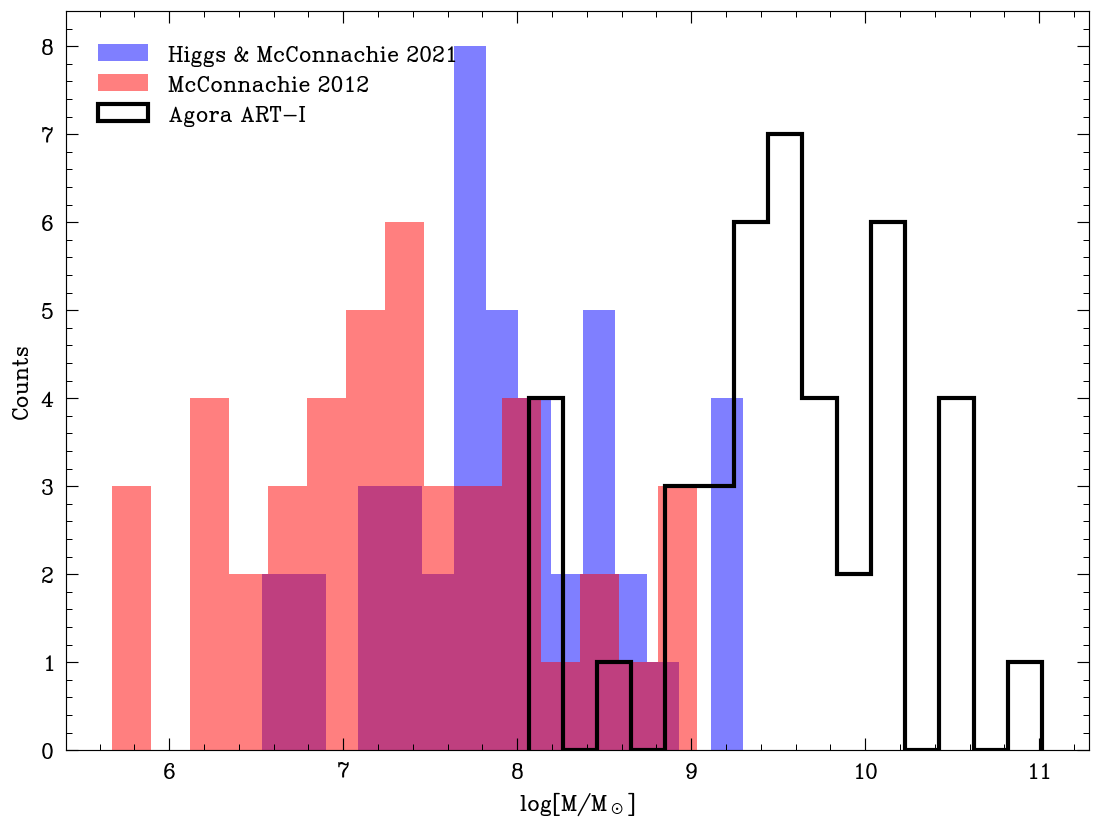

In [10]:
fig, ax = plt.subplots(figsize=(11,8))

ax.hist(np.log10(solo_dwarfs['Mtot']*1E6), color="blue", alpha=0.5, label="Higgs & McConnachie 2021")
ax.hist(np.log10(mccon['Mtot']*1E6), color="red", alpha=0.5, label="McConnachie 2012")
ax.hist(np.log10(agora_satellites['mass']), color="black", alpha=1, label="Agora ART-I", histtype="step", ls="-", lw=2.5)

ax.set_xlabel(r"log[M/M$_\odot$]")
ax.set_ylabel(r"Counts")
ax.legend(fontsize = 15)
plt.savefig(f"figs/comparative_logM.png")
plt.show()

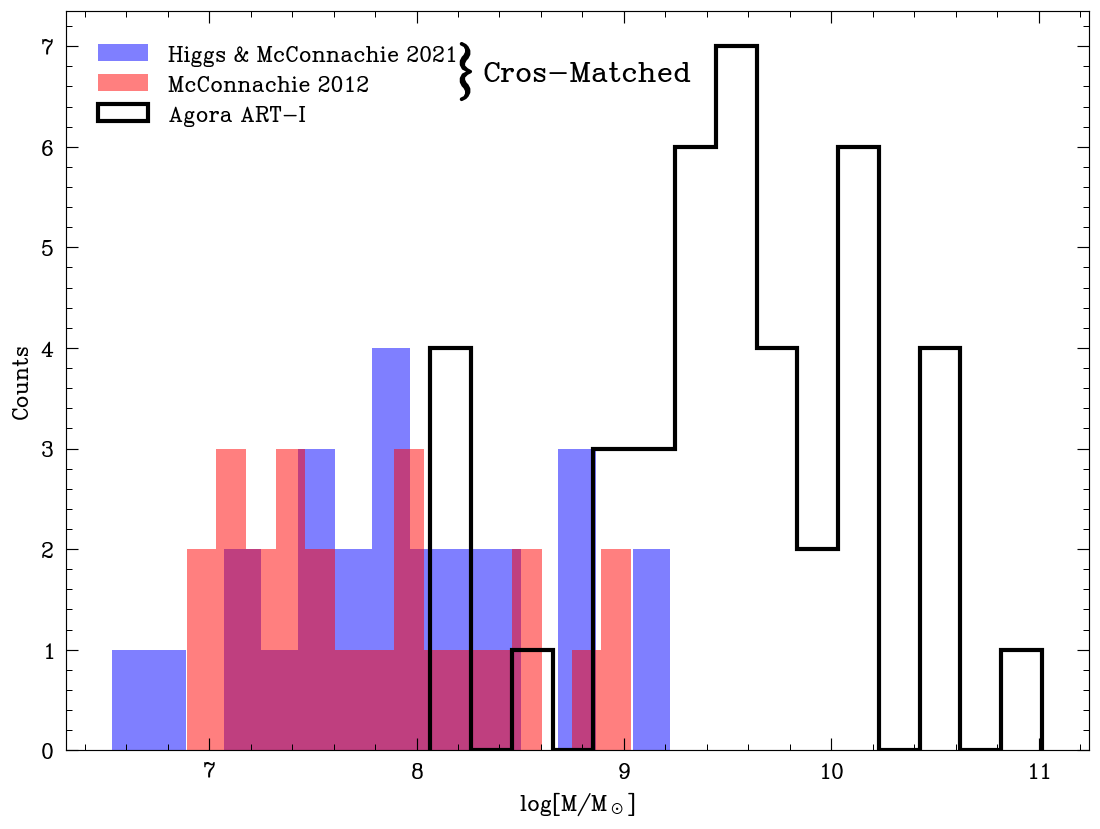

In [11]:
fig, ax = plt.subplots(figsize=(11,8))

ax.hist(np.log10(solo_dwarfs['Mtot'][solo_dwarfs['McConnCrossmatch'] == "True"]*1E6), color="blue", alpha=0.5, label="Higgs & McConnachie 2021")
ax.hist(np.log10(mccon['Mtot'][mccon['SoloCrossmatch'] == "True"]*1E6), color="red", alpha=0.5, label="McConnachie 2012")
ax.hist(np.log10(agora_satellites['mass']), color="black", alpha=1, label="Agora ART-I", histtype="step", ls="-", lw=2.5)

ax.set_xlabel(r"log[M/M$_\odot$]")
ax.set_ylabel(r"Counts")
ax.text(0.39, 0.92, "}", transform=ax.transAxes, fontsize=40, ha="center", va="center")
ax.text(0.51, 0.895 + 0.02, "Cros-Matched", transform=ax.transAxes, fontsize=20, ha="center", va="center")

ax.legend(fontsize = 15)
plt.savefig(f"figs/comparative_logM_crossmatched.png")
plt.show()

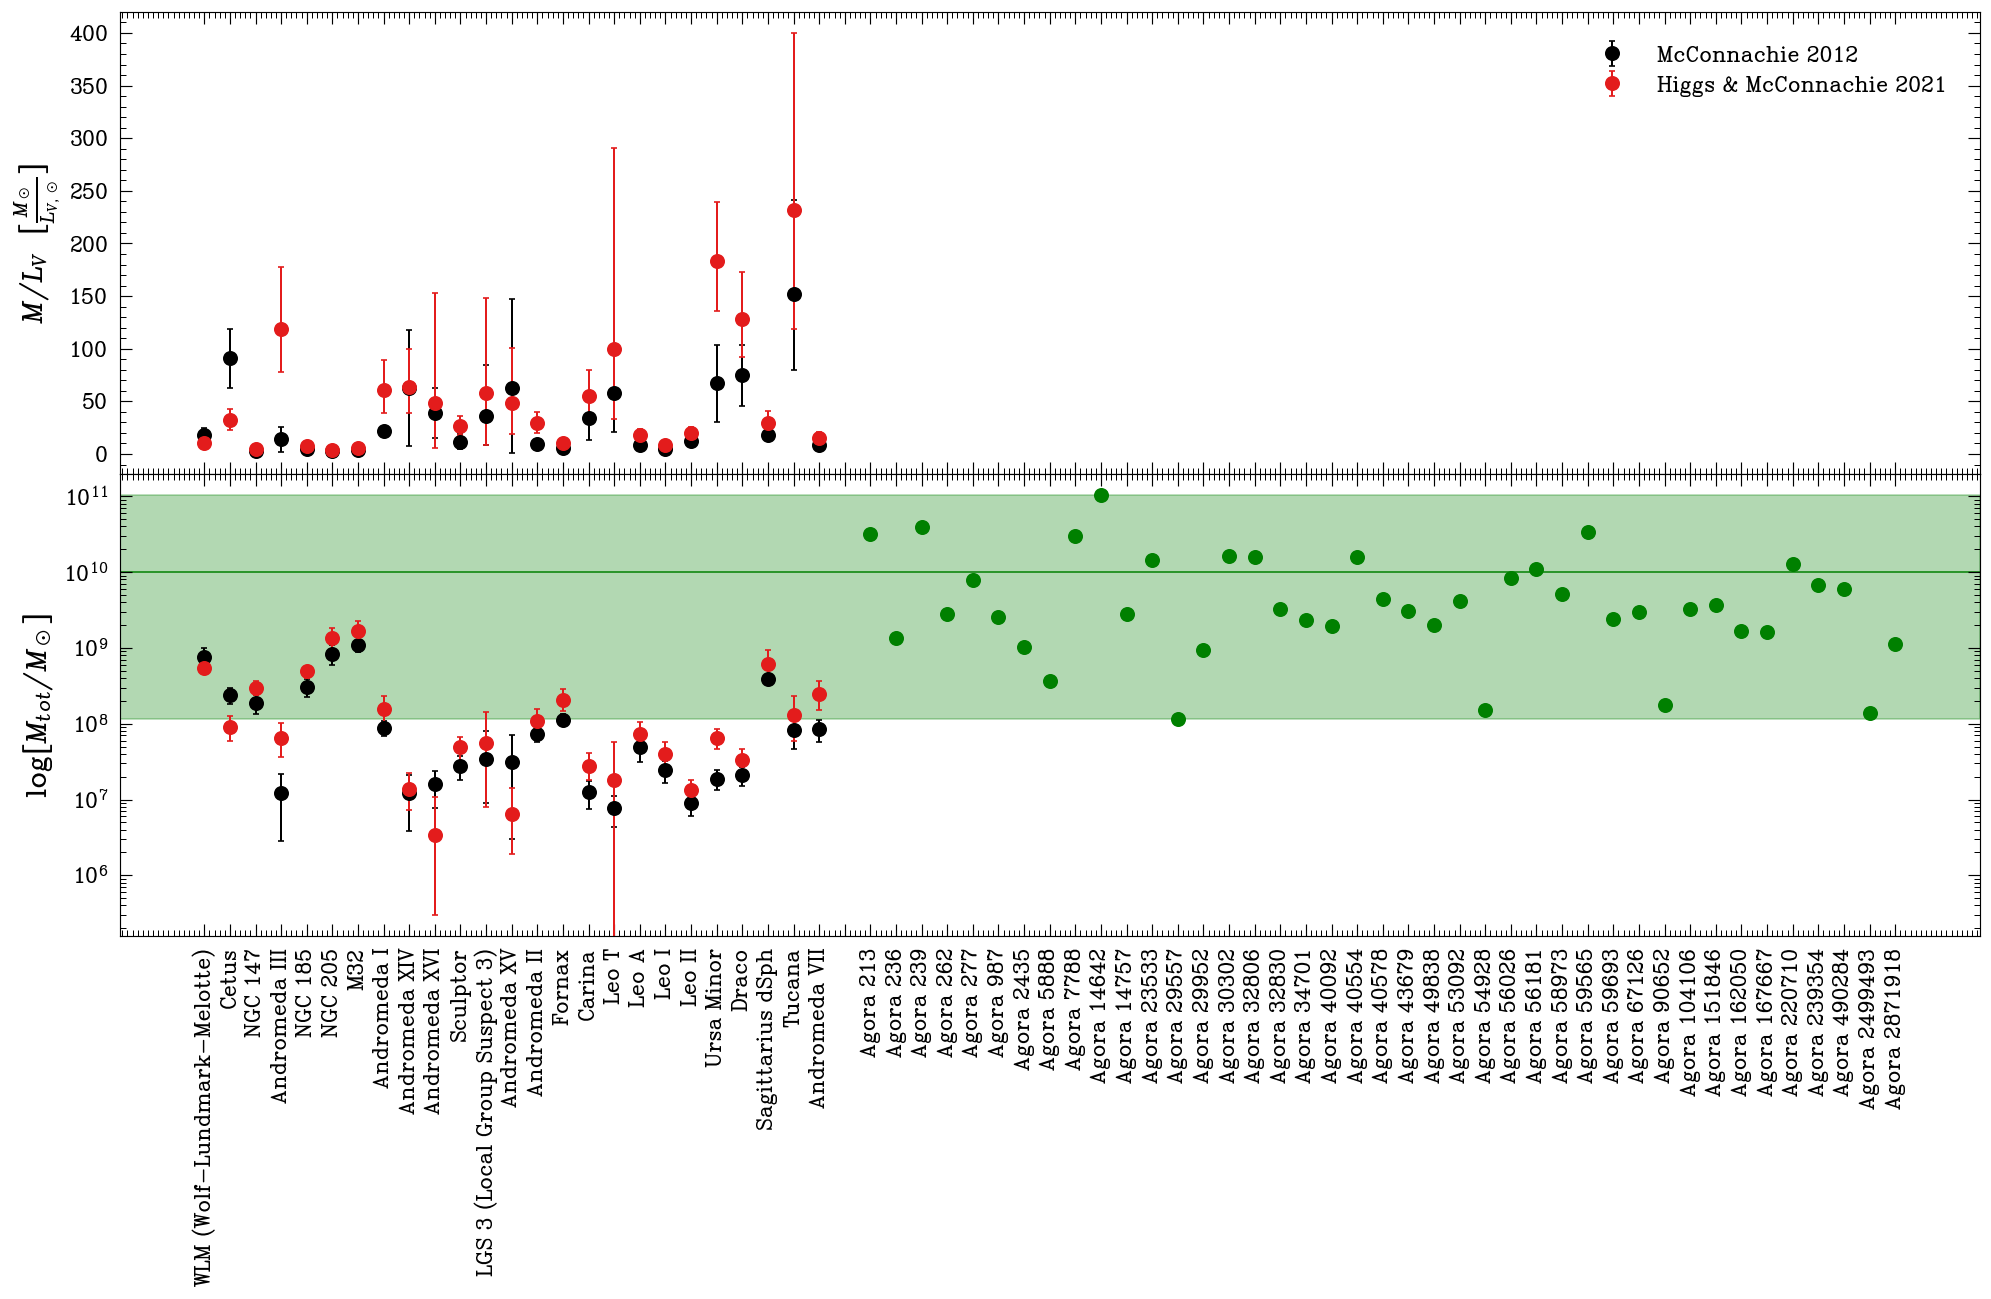

In [12]:
mccon_cross = mccon[mccon['SoloCrossmatch'] == "True"]
solo_cross = solo_dwarfs[solo_dwarfs['McConnCrossmatch'] == "True"]
mccon_cross.sort("RA")
solo_cross.sort("RA")

fig, (ax1, ax) = plt.subplots(figsize=(20,10), nrows=2, sharex=True)
plt.subplots_adjust(hspace=0)


ax.errorbar(mccon_cross['Name'], 1E6*mccon_cross['Mtot'], yerr=[1E6*mccon_cross['e_Mtot'], 1E6*mccon_cross['E_Mtot']], fmt="o")
ax.errorbar(mccon_cross['Name'], 1E6*solo_cross['Mtot'], yerr=[1E6*solo_cross['e_Mtot'], 1E6*solo_cross['E_Mtot']], fmt="o")
ax.scatter(list(['']+["Agora "+str(i) for i in np.array(agora_satellites['Sub_tree_id'].value, dtype=int)]), [np.nan] + list(agora_satellites['mass']), label="Agora ART-I", color="green")
ax.axhspan(agora_satellites['mass'].min(), agora_satellites['mass'].max(), color="green", alpha=0.3)
ax.axhspan(agora_satellites['mass'].mean(), agora_satellites['mass'].mean(), color="green", alpha=0.9)

ax.set_yscale("log")

ax1.errorbar(mccon_cross['Name'], mccon_cross['ML'], yerr=[mccon_cross['e_ML'], mccon_cross['E_ML']], fmt="o", label="McConnachie 2012")
ax1.errorbar(mccon_cross['Name'], solo_cross['ML'], yerr=[solo_cross['e_ML'], solo_cross['E_ML']], fmt="o", label="Higgs & McConnachie 2021")


ax.set_xticklabels(list(mccon_cross['Name']) + [' '] + ["Agora " + str(i) for i in np.array(agora_satellites['Sub_tree_id'].value, dtype=int)], rotation=90)
ax.set_ylabel(r"log[$M_{tot}/M_\odot$]", fontsize=20)
ax1.set_ylabel(r"$M/L_V \ \ [\frac{M_\odot}{L_{V,\odot}}]$", fontsize=20)
ax1.legend()
#plt.savefig(f"MLandMassComparison.png")
plt.savefig(f"figs/MLandMassComparison.png")


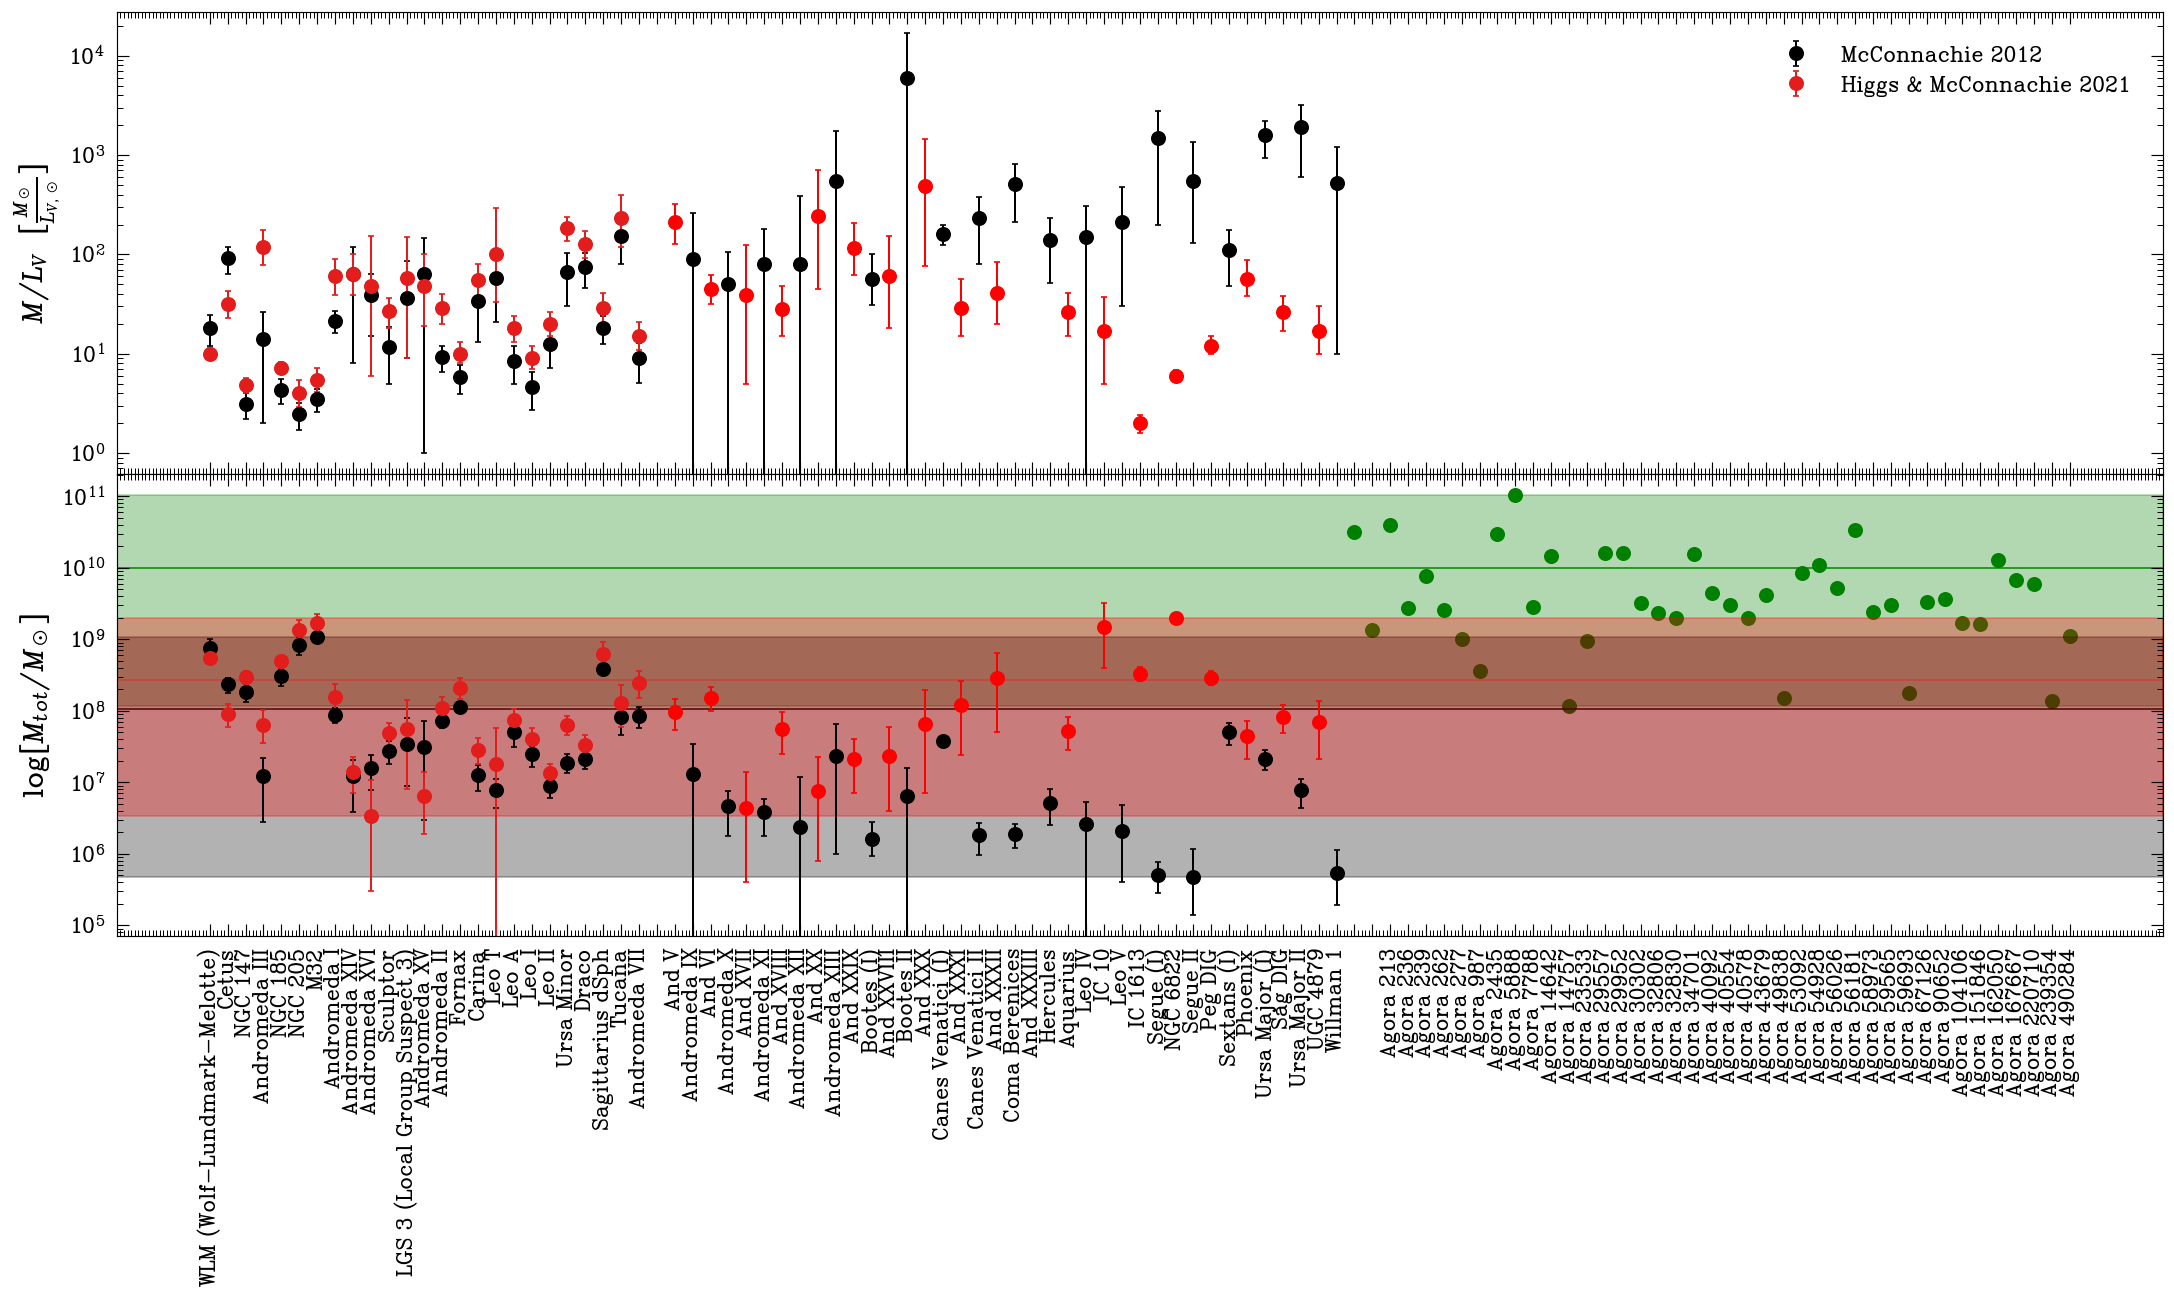

In [13]:
mccon_cross = mccon[mccon['SoloCrossmatch'] == "True"]
mccon_else  = mccon[mccon['SoloCrossmatch'] == "False"]
solo_cross = solo_dwarfs[solo_dwarfs['McConnCrossmatch'] == "True"]
solo_else = solo_dwarfs[solo_dwarfs['McConnCrossmatch'] == "False"]
mccon_cross.sort("RA")
solo_cross.sort("RA")

interleaved_names = [''] + [val for pair in zip(solo_else['Name'].value, mccon_else['Name'].value) for val in pair]
interleaved_masses = np.array([np.nan] + [val for pair in zip(solo_else['Mtot'].value, mccon_else['Mtot'].value) for val in pair])
interleaved_masses_e = np.array([np.nan] + [val for pair in zip(solo_else['e_Mtot'].value, mccon_else['e_Mtot'].value) for val in pair])
interleaved_masses_E = np.array([np.nan] + [val for pair in zip(solo_else['E_Mtot'].value, mccon_else['E_Mtot'].value) for val in pair])
interleaved_ML = np.array([np.nan] + [val for pair in zip(solo_else['ML'].value, mccon_else['ML'].value) for val in pair])
interleaved_ML_e = np.array([np.nan] + [val for pair in zip(solo_else['e_ML'].value, mccon_else['e_ML'].value) for val in pair])
interleaved_ML_E = np.array([np.nan] + [val for pair in zip(solo_else['E_ML'].value, mccon_else['E_ML'].value) for val in pair])

interleaved_colors = ['red'] + ['red' if i % 2 == 0 else 'black' for i in range(len(interleaved_names))]

total_names = list(mccon_cross['Name']) + interleaved_names + [' ', ' '] + ["Agora " + str(i) for i in np.array(agora_satellites['Sub_tree_id'].value, dtype=int)]

fig, (ax1, ax) = plt.subplots(figsize=(22,10), nrows=2, sharex=True)
plt.subplots_adjust(hspace=0)


ax.errorbar(mccon_cross['Name'], 1E6*mccon_cross['Mtot'], yerr=[1E6*mccon_cross['e_Mtot'], 1E6*mccon_cross['E_Mtot']], fmt="o")
ax.errorbar(mccon_cross['Name'], 1E6*solo_cross['Mtot'], yerr=[1E6*solo_cross['e_Mtot'], 1E6*solo_cross['E_Mtot']], fmt="o")
for i in range(len(interleaved_masses)):
    ax.errorbar(interleaved_names[i], 1E6*interleaved_masses[i], yerr=np.array([1E6*interleaved_masses_e[i],1E6*interleaved_masses_E[i]]).reshape((2,1)), fmt="o", color=interleaved_colors[i])
    
ax.scatter(list(['', '']+["Agora "+str(i) for i in np.array(agora_satellites['Sub_tree_id'].value, dtype=int)]), [np.nan, np.nan] + list(agora_satellites['mass']), label="Agora ART-I", color="green")
ax.axhspan(agora_satellites['mass'].min(), agora_satellites['mass'].max(), color="green", alpha=0.3)
ax.axhspan(agora_satellites['mass'].mean(), agora_satellites['mass'].mean(), color="green", alpha=0.9)

ax.axhspan(1E6*mccon['Mtot'].min(), 1E6*mccon['Mtot'].max(), color="black", alpha=0.3)
ax.axhspan(1E6*mccon['Mtot'].mean(), 1E6*mccon['Mtot'].mean(), color="black", alpha=0.9)

ax.axhspan(np.nanmin(1E6*solo_dwarfs['Mtot']), np.nanmax(1E6*solo_dwarfs['Mtot']), color="red", alpha=0.3)
ax.axhspan(np.nanmean(1E6*solo_dwarfs['Mtot']), np.nanmean(1E6*solo_dwarfs['Mtot']), color="red", alpha=0.3)

ax.set_yscale("log")

ax1.errorbar(mccon_cross['Name'], mccon_cross['ML'], yerr=[mccon_cross['e_ML'], mccon_cross['E_ML']], fmt="o", label="McConnachie 2012")
ax1.errorbar(mccon_cross['Name'], solo_cross['ML'], yerr=[solo_cross['e_ML'], solo_cross['E_ML']], fmt="o", label="Higgs & McConnachie 2021")
for i in range(len(interleaved_masses)):
    ax1.errorbar(interleaved_names[i], interleaved_ML[i], yerr=np.array([interleaved_ML_e[i],interleaved_ML_E[i]]).reshape((2,1)), fmt="o", color=interleaved_colors[i])
ax1.set_yscale("log")

ax.set_xticklabels(total_names, rotation=90)
ax.set_ylabel(r"log[$M_{tot}/M_\odot$]", fontsize=20)
ax1.set_ylabel(r"$M/L_V \ \ [\frac{M_\odot}{L_{V,\odot}}]$", fontsize=20)
ax1.legend()
plt.savefig(f"figs/MLandMassComparison_v2.png")


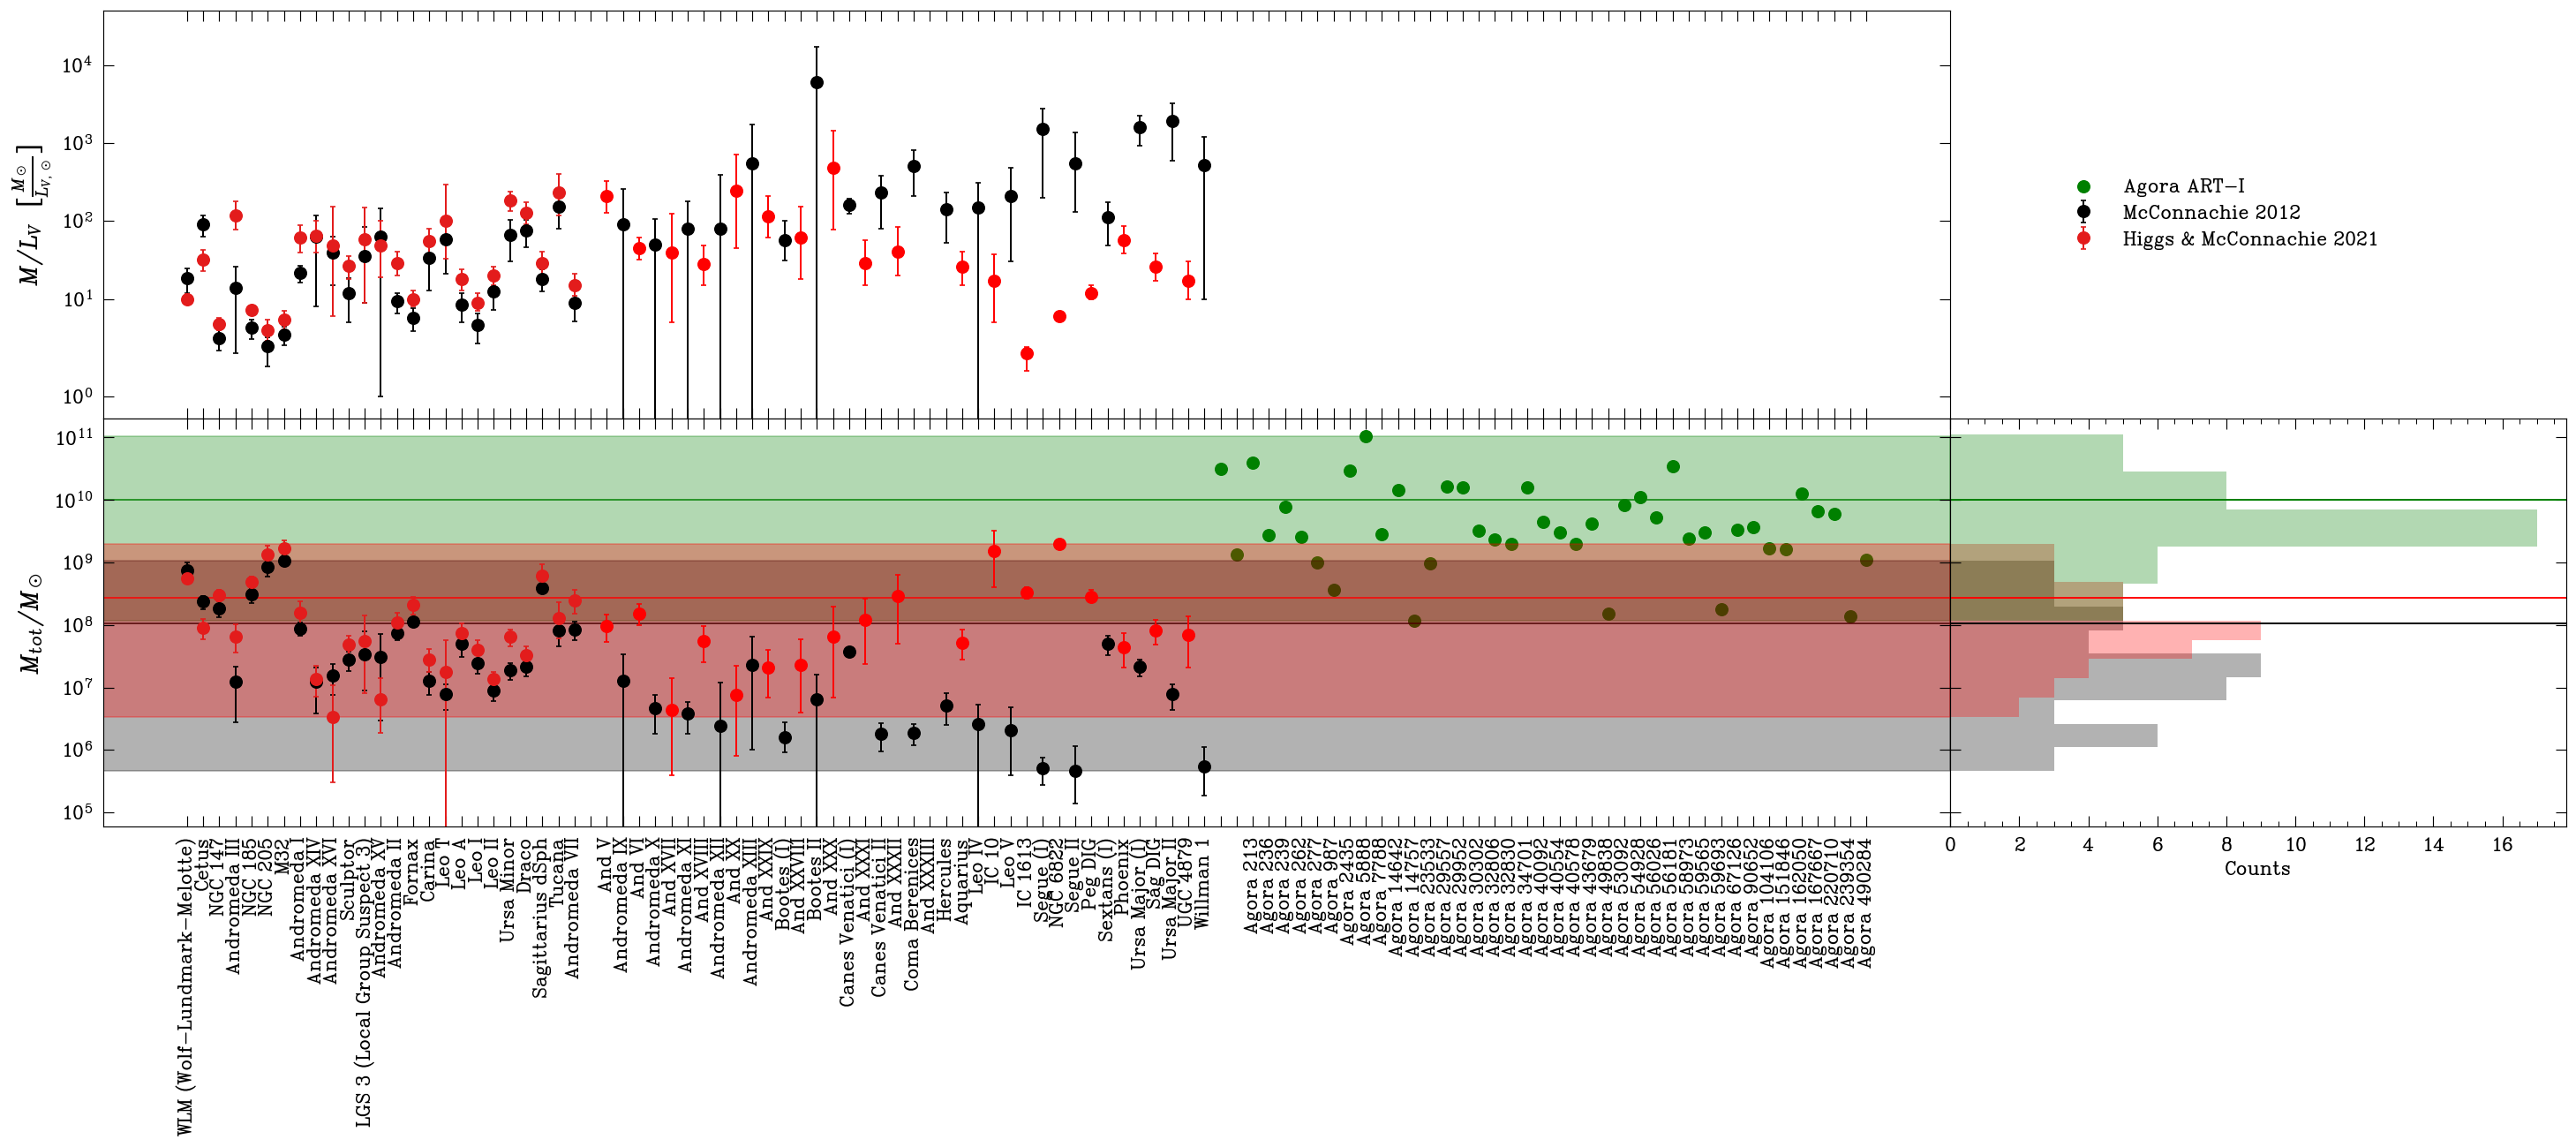

In [14]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(30, 10))

# Define the grid spec: 2 rows, 2 columns with width ratios
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1])  # Adjust ratios here

# Create subplots using the GridSpec
ax1 = fig.add_subplot(gs[0, 0])  # Top-left
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1)  # Top-right
ax = fig.add_subplot(gs[1, 0], sharex= ax1)  # Bottom-left
ax3 = fig.add_subplot(gs[1, 1], sharey=ax, sharex = ax2)  # Bottom-right

# Adjust layout spacing
plt.subplots_adjust(hspace=0, wspace=0)

# First subplot: Total mass vs. Name
ax.errorbar(mccon_cross['Name'], 1E6 * mccon_cross['Mtot'], 
            yerr=[1E6 * mccon_cross['e_Mtot'], 1E6 * mccon_cross['E_Mtot']], fmt="o", label="McConnachie 2012")
ax.errorbar(mccon_cross['Name'], 1E6 * solo_cross['Mtot'], 
            yerr=[1E6 * solo_cross['e_Mtot'], 1E6 * solo_cross['E_Mtot']], fmt="o", label="Higgs & McConnachie 2021")
for i in range(len(interleaved_masses)):
    ax.errorbar(interleaved_names[i], 1E6 * interleaved_masses[i], 
                yerr=np.array([1E6 * interleaved_masses_e[i], 1E6 * interleaved_masses_E[i]]).reshape((2, 1)), fmt="o", 
                color=interleaved_colors[i])

# Adding scatter and shading
ax.scatter([''] + ["Agora " + str(i) for i in np.array(agora_satellites['Sub_tree_id'].value, dtype=int)], 
           [np.nan] + list(agora_satellites['mass']), label="Agora ART-I", color="green",)
ax.axhspan(agora_satellites['mass'].min(), agora_satellites['mass'].max(), color="green", alpha=0.3)
ax.axhspan(agora_satellites['mass'].mean(), agora_satellites['mass'].mean(), color="green", alpha=0.9)

ax.axhspan(1E6 * mccon['Mtot'].min(), 1E6 * mccon['Mtot'].max(), color="black", alpha=0.3, )
ax.axhspan(1E6 * mccon['Mtot'].mean(), 1E6 * mccon['Mtot'].mean(), color="black", alpha=0.9)

ax.axhspan(np.nanmin(1E6 * solo_dwarfs['Mtot']), np.nanmax(1E6 * solo_dwarfs['Mtot']), color="red", alpha=0.3)
ax.axhspan(np.nanmean(1E6 * solo_dwarfs['Mtot']), np.nanmean(1E6 * solo_dwarfs['Mtot']), color="red", alpha=0.9)

# Set log scale
ax.set_yscale("symlog")

# Second subplot: ML vs. Name
ax1.errorbar(mccon_cross['Name'], mccon_cross['ML'], 
             yerr=[mccon_cross['e_ML'], mccon_cross['E_ML']], fmt="o")
ax1.errorbar(mccon_cross['Name'], solo_cross['ML'], 
             yerr=[solo_cross['e_ML'], solo_cross['E_ML']], fmt="o")
for i in range(len(interleaved_masses)):
    ax1.errorbar(interleaved_names[i], interleaved_ML[i], 
                  yerr=np.array([interleaved_ML_e[i], interleaved_ML_E[i]]).reshape((2, 1)), fmt="o", 
                  color=interleaved_colors[i])

# Set log scale for ML plot
ax1.set_yscale("symlog")



ax3.hist(1E6*mccon['Mtot'], orientation='horizontal', color='black', alpha=0.3, bins=np.logspace(np.log10(1E6*mccon['Mtot'].min()), np.log10(1E6*mccon['Mtot'].max()),10))
ax3.hist(1E6*solo_dwarfs['Mtot'], orientation='horizontal', color='red', alpha=0.3, bins=np.logspace(np.log10(np.nanmin(1E6*solo_dwarfs['Mtot'])), np.log10(np.nanmax(1E6*solo_dwarfs['Mtot'])),10))
ax3.hist(agora_satellites['mass'], orientation='horizontal', color='green', alpha=0.3, bins=np.logspace(np.log10(agora_satellites['mass'].min()), np.log10(1.06*agora_satellites['mass'].max()),6))
ax3.axhline(agora_satellites['mass'].mean(), color="green")
ax3.axhline(np.nanmean(1E6 * solo_dwarfs['Mtot']), color="red")
ax3.axhline(np.nanmean(1E6 * mccon['Mtot']), color="black")



# Set x-tick labels and rotation
ax.set_xticklabels(total_names, rotation=90)
ax1.set_xticklabels(total_names, rotation=90)
ax3.tick_params(axis='y', which='both', labelleft=False)
ax2.tick_params(axis='y', which='both', labelleft=False)

ax2.tick_params(axis='x', which='both', labelbottom=False)
ax3.tick_params(axis='x', which='both', labelbottom=True)

ax.minorticks_off()
ax2.set_visible(False)

ax1.set_ylim(0.5, 5E4)
ax.set_ylim(6E4, 2E11)

# Set axis labels
ax.set_ylabel(r"$M_{tot}/M_\odot$", fontsize=20)
ax1.set_ylabel(r"$M/L_V \ \ [\frac{M_\odot}{L_{V,\odot}}]$", fontsize=20)
ax3.set_xlabel("Counts")
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.75))
plt.savefig(f"figs/MLandMassComparison_v3.png")


### PLOTS NUEVOS PROPIEDADES DWARFS

In [3]:
candidates = vstack([
                    Table.read("../satellite_tables-CopyNew/ART_satellitesV5_Rvir1.0.csv", format="csv"),
                    Table.read("../satellite_tables-CopyNew/ART_satellitesV5_Rvir1.5.csv", format="csv"),
                    Table.read("../satellite_tables-CopyNew/ART_satellitesV5_Rvir2.0.csv", format="csv"),
                    Table.read("../satellite_tables-CopyNew/ART_satellitesV5_Rvir3.0.csv", format="csv"),
                    Table.read("../satellite_tables-CopyNew/ART_satellitesV5_Rvir4.0.csv", format="csv"),
                    Table.read("../satellite_tables-CopyNew/ART_satellitesV5_Rvir5.0.csv", format="csv")
                    ]
)

candidates2 = vstack([
                    Table.read("../satellite_tables-CopyNew/GEAR_satellitesV5_Rvir1.0.csv", format="csv"),
                    Table.read("../satellite_tables-CopyNew/GEAR_satellitesV5_Rvir1.5.csv", format="csv"),
                    Table.read("../satellite_tables-CopyNew/GEAR_satellitesV5_Rvir2.0.csv", format="csv"),
                    Table.read("../satellite_tables-CopyNew/GEAR_satellitesV5_Rvir3.0.csv", format="csv"),
                    Table.read("../satellite_tables-CopyNew/GEAR_satellitesV5_Rvir4.0.csv", format="csv"),
                    Table.read("../satellite_tables-CopyNew/GEAR_satellitesV5_Rvir5.0.csv", format="csv")
                    ]
)

FileNotFoundError: [Errno 2] No such file or directory: '../satellite_tables-CopyNew/ART_satellitesV5_Rvir1.0.csv'

In [5]:
mccon = Table.read('../DwarfProperties/data/LocalGroup/McConnachie_properties_complete.dat', format = "ascii.fixed_width", delimiter="\t")
mccon2 = Table.read('../DwarfProperties/data/LocalGroup/McCOnnachie_2012.csv')
solo_dwarfs = Table.read('../DwarfProperties/data/LocalGroup/SoloDwarfs_IV_complete.dat', format = "ascii.fixed_width", delimiter="\t")
globc = Table.read("../DwarfProperties/data/GC_Harris1997.dat", format="ascii.csv",delimiter=";", comment="#")

In [6]:
my_model = CmdStanModel(stan_file="./scripts/linear_noErrors_robust.stan", cpp_options={'STAN_THREADS':'true'})
my_model.name
my_model.stan_file
my_model.exe_file
my_model.code()

'data {\n    int<lower=0> N;\n    int<lower=0> M;\n    vector[N] x;\n    vector[N] y;\n    vector[M] xeval;\n}\n\nparameters {\n    real beta0;\n    real beta1;\n    real<lower=0> sigma;\n    real<lower=0> nu;\n}\n\nmodel {\n    y ~ student_t(nu, beta0 + beta1 * x, sigma);\n    beta0 ~ normal(0., 100.);\n    beta1 ~ normal(0., 100.);\n    sigma ~ cauchy(0., 100.);\n    nu ~ exponential(1./30.);\n}\n\ngenerated quantities {\n    vector[N] logLikelihood;\n    vector[M] dpp;\n        \n    for (i in 1:N){\n      logLikelihood[i] = student_t_lpdf(x[i] | nu, beta0 + beta1 * x[i], sigma ) ;\n    }\n    for (i in 1:M){\n      dpp[i] = student_t_rng(nu, beta0 + beta1 * xeval[i], sigma) ;\n    }\n    \n    \n}'

In [7]:
dwarf_data = {
"N": len(mccon['VMag'].value),
"M": 2,
"x": np.log10(mccon['Mdyn'].value*1E6).tolist(),
"y": mccon['VMag'].value.tolist(),
'xeval' : np.log10([10,10]).tolist()
}

fit = my_model.sample(data=dwarf_data, chains=4, iter_sampling=5000, show_console=False)


12:40:19 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:40:20 - cmdstanpy - INFO - CmdStan done processing.
12:40:20 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: student_t_lpdf: Degrees of freedom parameter is 0, but must be positive finite! (in 'linear_noErrors_robust.stan', line 17, column 4 to column 48)
	Exception: student_t_lpdf: Degrees of freedom parameter is 0, but must be positive finite! (in 'linear_noErrors_robust.stan', line 17, column 4 to column 48)
Consider re-running with show_console=True if the above output is unclear!


In [69]:
from tqdm import tqdm

In [70]:
file_pairs = {
    "ART": ["ART_satellitesV5_Rvir1.0.csv", "ART_satellitesV5_Rvir1.5.csv", "ART_satellitesV5_Rvir2.0.csv", "ART_satellitesV5_Rvir3.0.csv", "ART_satellitesV5_Rvir4.0.csv", "ART_satellitesV5_Rvir5.0.csv"],
    "GEAR": ["GEAR_satellitesV5_Rvir1.0.csv", "GEAR_satellitesV5_Rvir1.5.csv", "GEAR_satellitesV5_Rvir2.0.csv", "GEAR_satellitesV5_Rvir3.0.csv", "GEAR_satellitesV5_Rvir4.0.csv", "GEAR_satellitesV5_Rvir5.0.csv"]
}

In [5]:
df = fit.draws_pd()

In [7]:
def return_anotated_fig():
    global mccon, mccon2, solo_dwarfs, globc, s4g

    morph_mccon = mccon2
    
    trans_dict = {'dIrr/dSph': "p",
                  'dIrr': "*",
                  'dE/dSph': "h",
                  'cE': "D",
                  "Sc": "P",
                  'Irr': "s", 
                  '????': "x",
                  '(d)Irr?': "s",
                  'dSph' : "o",
                  'dSph?': "o"
                 }
    
    import matplotlib.gridspec as gridspec
    
    
    
    plt.rcParams['axes.linewidth'] = 1.1
    plt.rcParams['xtick.major.width'] = 1.1
    plt.rcParams['xtick.minor.width'] = 1.1
    plt.rcParams['ytick.major.width'] = 1.1
    plt.rcParams['ytick.minor.width'] = 1.1
    
    plt.rcParams['xtick.major.size'] = 7
    plt.rcParams['ytick.major.size'] = 7
    
    z = np.polyfit(np.log10(mccon['Mdyn'] * 1E6), np.log10(mccon['LV'] * 1E6 * 0.5), 1)
    p = np.poly1d(z)
    md = np.linspace(1E5, 1E10, 1000)
    lhalf = 10 ** (z[0] * np.log10(md) + z[1])
    MV = 4.84 - 2.5 * np.log10(2*lhalf)
    
    
    
    
    
    fig = plt.figure(figsize=(1.5*1.8*9,1.8*9))
        
        
    gs = gridspec.GridSpec(2, 3, hspace=0, wspace=0)
    
    ax1 = fig.add_subplot(gs[0])  
    ax2 = fig.add_subplot(gs[1])  
    ax3 = fig.add_subplot(gs[4])  
    ax4 = fig.add_subplot(gs[3])  
    
    ax5 = fig.add_subplot(gs[2])  
    ax6 = fig.add_subplot(gs[5])  
    
    
    j = 0
    
    i = 0
    for key, value in trans_dict.items():
        morph_mccon = mccon2[mccon2['MType'] == key]
        
        if key != "dSph?" and key != "(d)Irr?":
            ax1.scatter([np.nan],[np.nan], marker=value, color="black", s=40, label=f"{key}") 
    
            
        if i==8:
            a1 = ax1.scatter(morph_mccon['R2'][morph_mccon['SubG'] == "MW"], morph_mccon['VMag'][morph_mccon['SubG'] == "MW"], marker=value, color="red", s=40, label=f"Milky-Way group")
            a2 = ax1.scatter(morph_mccon['R2'][morph_mccon['SubG'] == "M31"], morph_mccon['VMag'][morph_mccon['SubG'] == "M31"], marker=value, color="blue",s=40, label=f"Andromeda gruop")
            a3 = ax1.scatter(morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], morph_mccon['VMag'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, label=f"Local group "+r"($D_{LG} \leq 1Mpc$)")
            a4 = ax1.scatter(morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], morph_mccon['VMag'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, label=f"Nearby galaxies "+r"($D_{LG} > 1Mpc$)")
        else:
            ax1.scatter(morph_mccon['R2'][morph_mccon['SubG'] == "MW"], morph_mccon['VMag'][morph_mccon['SubG'] == "MW"], marker=value, color="red", s=40 )
            ax1.scatter(morph_mccon['R2'][morph_mccon['SubG'] == "M31"], morph_mccon['VMag'][morph_mccon['SubG'] == "M31"], marker=value, color="blue",s=40 )
            ax1.scatter(morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], morph_mccon['VMag'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40 )
            ax1.scatter(morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], morph_mccon['VMag'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40 ) 
    
    
        
        ax1.set_xscale("log")
        ax1.invert_yaxis()
        ax1.set_xlim(1,7000)
        ax1.set_ylim(1, -21)
        ax1.set_xlabel(r"$r_h$ [pc]")
        ax1.set_xticklabels([0, 1, 10, 100, 1000])
        ax1.set_ylabel(r"$M_V$ [mag]" )
        ax1.legend()
    
        i += 1
        
        
        
        
        y = morph_mccon['R2'] 
        x = morph_mccon['Mdyn'] * 1E6 
        ax3.scatter(x[morph_mccon['SubG'] == "MW"], y[morph_mccon['SubG'] == "MW"], marker=value, color="red", s=40, )
        ax3.scatter(x[morph_mccon['SubG'] == "M31"], y[morph_mccon['SubG'] == "M31"], marker=value, color="blue",s=40, )
        ax3.scatter(1E6 * morph_mccon['Mdyn'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, )
        ax3.scatter(1E6 * morph_mccon['Mdyn'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, )
        
        ax3.set_ylabel(r"$r_h$ [pc]")
        ax3.set_xlabel(r"$M_{dyn} (\leq r_h) \ \ [M_\odot]$")
        ax3.loglog()
        ax3.set_xlim(1E5, 1E10)
        ax3.set_ylim(ax1.get_xlim())
        ax3.set_yticklabels(ax1.get_xticklabels())
        
        
        
        
        
        
        y = morph_mccon['VMag']
        x = 1E6 * morph_mccon['Mdyn']
        ax2.scatter(x[morph_mccon['SubG'] == "MW"], y[morph_mccon['SubG'] == "MW"], marker=value, color="red", s=40, )
        ax2.scatter(x[morph_mccon['SubG'] == "M31"], y[morph_mccon['SubG'] == "M31"], marker=value, color="blue",s=40, )
        ax2.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, )
        ax2.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, )
        
        
         
        
        
        ax2.set_xscale("log")
        ax2.invert_yaxis()
        ax2.set_ylim(ax1.get_ylim())
        ax2.set_ylabel(None)
        ax2.set_yticklabels([])
        ax2.set_xticklabels([])
        ax2.set_xlabel(None)
        ax2.set_xlim(ax3.get_xlim())
    
    
    
        x = morph_mccon['sigma*']
        y = morph_mccon['R2']
        ax6.scatter(x[morph_mccon['SubG'] == "MW"], y[morph_mccon['SubG'] == "MW"], marker=value, s=40, color="red")
        ax6.scatter(x[morph_mccon['SubG'] == "M31"], y[morph_mccon['SubG'] == "M31"],  marker=value, s=40, color="blue")
        #ax6.scatter(x[(morph_mccon['SubG'] == "Rest")], y[(morph_mccon['SubG'] == "Rest")], marker=value, s=40, color="green")
        ax6.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, )
        ax6.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, )
        
        ax6.set_xscale("log")
        ax6.set_yscale("log")
        ax6.set_xlim(2, 100)
        ax6.set_xlabel(r"$\sigma_*$ [km/s]")
        ax6.set_ylabel("")
        ax6.set_yticklabels([])
        ax6.set_ylim(ax3.get_ylim())
    
    
    
    
    
        x = morph_mccon['sigma*']
        y = morph_mccon['VMag']
        ax5.scatter(x[morph_mccon['SubG'] == "MW"], y[morph_mccon['SubG'] == "MW"], marker=value, s=40, color="red")
        ax5.scatter(x[morph_mccon['SubG'] == "M31"], y[morph_mccon['SubG'] == "M31"],  marker=value, s=40, color="blue")
        ax5.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, )
        ax5.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, )    
        
        
        ax5.set_xscale("log")
        ax5.set_yscale("linear")
        ax5.set_xlim(ax6.get_xlim())
        ax5.set_xlabel("")
        ax5.set_ylabel("")
        ax5.set_yticklabels([])
        ax5.set_xticklabels([])
        ax5.set_ylim(ax1.get_ylim())
    
    
    legend_GC = ax1.scatter(60/206265 * globc['Rh']  * globc['Rsun'] * 1E3, globc['MVt'], s=10, label="MW globular clusters")
    
    bf = ax2.plot(md, df['beta0'].mean() + df['beta1'].mean()*np.log10(md), lw=2, zorder=10, label="Best Fit")
    
    for beta0, beta1 in df[['beta0', 'beta1']].values[::1]:
        ax2.plot(md, beta0 + beta1 * np.log10(md), lw=1, alpha=0.1, color="lightblue", zorder=-1)


    return fig
    

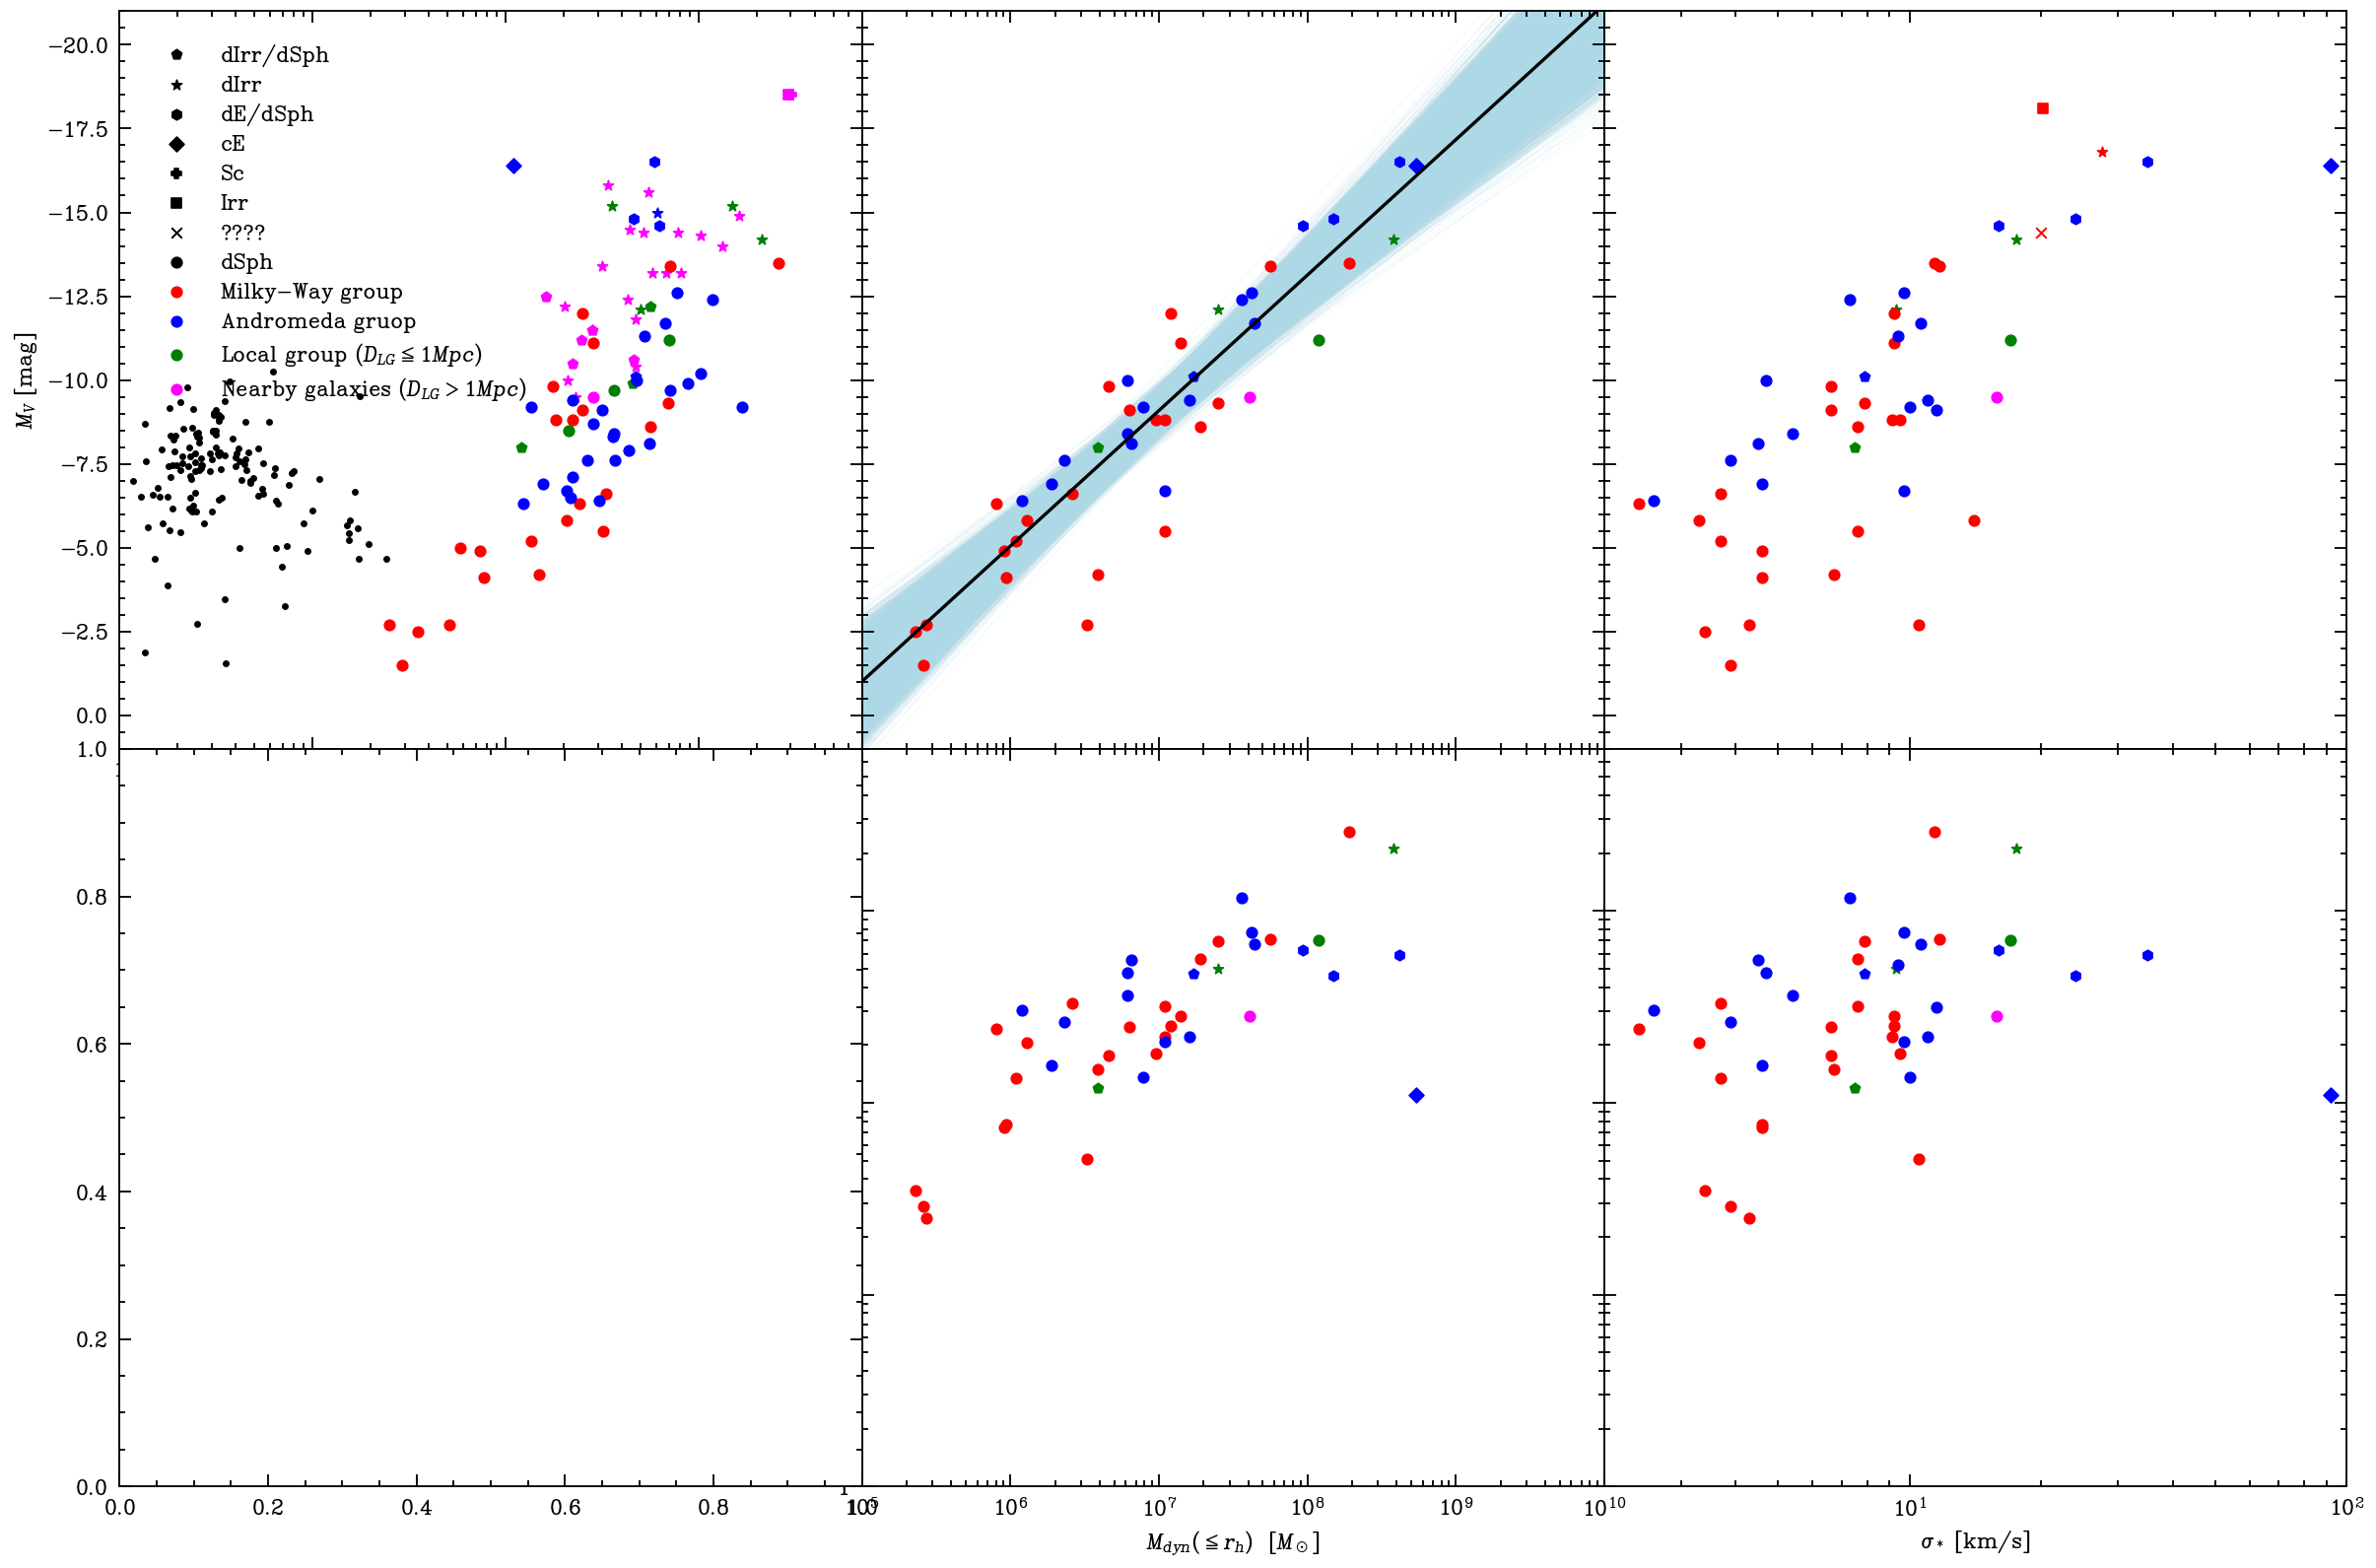

In [8]:
fig = return_anotated_fig()

In [12]:
axes = fig.get_axes()

In [15]:
axes[0].scatter(200, -20)

In [18]:
plt.close()

In [ ]:
Table.read("")

In [11]:
ARTfile, GEARfile = "./output_ART/ART_Satellites.csv", "./output_GEAR/GEAR_Satellites.csv"
fdir = "./"
art, gear = pd.read_csv(fdir + ARTfile), pd.read_csv(fdir + GEARfile)
#art["Mdyn2"] = 580 * 1E3 * art['rh3D_stars_physical'] * art['sigma*']**2
#gear["Mdyn2"] = 580 * 1E3 * gear['rh3D_stars_physical'] * gear['sigma*']**2

MV_art = df["beta0"].values[:, np.newaxis]+ df["beta1"].values[:, np.newaxis] * np.log10(art["Mdyn"].values)
MV_gear = df["beta0"].values[:, np.newaxis]+ df["beta1"].values[:, np.newaxis] * np.log10(gear["Mdyn"].values)

ML_art = art["stellar_mass"].values / (10 ** ( (MV_art - 4.74)/-2.5 ))
ML_gear = gear["stellar_mass"].values / (10 ** ( (MV_gear - 4.74)/-2.5 ))


art["MV_pred"] = np.mean(MV_art, axis=0)
art["e_MV_pred"] = np.std(MV_art, axis=0)
art["ML_stars"] = np.mean(ML_art, axis=0)
art["e_ML_stars"] = np.std(ML_art, axis=0)



gear["MV_pred"] = np.mean(MV_gear, axis=0)
gear["e_MV_pred"] = np.std(MV_gear, axis=0)
gear["ML_stars"] = np.mean(ML_gear, axis=0)
gear["e_ML_stars"] = np.std(ML_gear, axis=0)


art.to_csv("./output_ART/extra_ART_Satellites.csv", index=False)
gear.to_csv("./output_GEAR/extra_GEAR_Satellites.csv", index=False)

In [12]:
art, gear = pd.read_csv("./output_ART/extra_ART_Satellites.csv").set_index("Sub_tree_id"), pd.read_csv("./output_GEAR/extra_GEAR_Satellites.csv").set_index("Sub_tree_id")

In [14]:
art

,Halo_ID,Snapshot,Redshift,Time,uid,desc_uid,mass,num_prog,virial_radius,scale_radius,...,rh3D_dm_physical,Mhl,sigma*,e_sigma*,Mdyn,e_Mdyn,MV_pred,e_MV_pred,ML_stars,e_ML_stars
Sub_tree_id,,,,,,,,,,,,,,,,,,,,,
29557.0,28.0,122.0,5.475007,1.078857,855778.0,868443.0,5.401709e+08,1.0,26.874643,8.394588,...,2.183623,1.289435e+08,20.601925,8.093679,1.758780e+08,1.359797e+08,-14.112654,0.428829,0.069530,0.028902
54928.0,384.0,122.0,5.475007,1.078857,855719.0,868384.0,1.900285e+08,1.0,18.972935,18.380342,...,1.697898,4.787912e+07,7.587801,1.132991,2.618890e+07,7.991646e+06,-10.772010,0.275887,0.357967,0.093177
29557.0,23.0,123.0,5.425083,1.091414,868443.0,881396.0,4.519943e+08,1.0,25.323362,5.789174,...,2.126906,1.317433e+08,20.181348,6.511490,1.786420e+08,1.040409e+08,-14.140007,0.430349,0.065632,0.027388
54928.0,353.0,123.0,5.425083,1.091414,868384.0,881338.0,1.766382e+08,1.0,18.511396,14.475783,...,1.623226,4.532176e+07,7.364517,1.124826,2.385463e+07,7.145361e+06,-10.608250,0.271050,0.414663,0.105963
29557.0,27.0,124.0,5.375112,1.104228,881396.0,894526.0,4.572650e+08,2.0,25.421654,5.545584,...,2.109957,1.382038e+08,22.038723,4.900610,1.953249e+08,7.543358e+07,-14.296616,0.439102,0.055079,0.023495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23533.0,NaN,379.0,0.005549,13.790314,NaN,NaN,2.429192e+09,NaN,35.360377,NaN,...,6.552329,5.606317e+08,22.001589,12.173172,8.452002e+08,1.467865e+09,-16.866243,0.591501,0.080228,0.047931
490284.0,NaN,379.0,0.005549,13.790314,NaN,NaN,2.734035e+09,NaN,36.783510,NaN,...,8.503017,2.180913e+08,15.182082,0.479078,1.472303e+08,1.276794e+07,-13.800785,0.411692,0.242780,0.096547
14757.0,NaN,379.0,0.005549,13.790314,NaN,NaN,4.981346e+08,NaN,20.851486,NaN,...,9.261555,1.152430e+08,6.972065,1.523625,8.646278e+07,5.240103e+07,-12.867094,0.362923,0.609341,0.211649


In [28]:
ml0_series_art = art.groupby(level=0).apply(lambda g: g.iloc[(g["R/Rvir"] - 2).abs().argmin()]["ML_stars"])
ml0_series_gear= gear.groupby(level=0).apply(lambda g: g.iloc[(g["R/Rvir"] - 2).abs().argmin()]["ML_stars"])
art["ML0"] = art.index.map(ml0_series_art)
gear["ML0"] = gear.index.map(ml0_series_gear)

In [29]:




art["L_1"] = art['stellar_mass'] / art['ML0']



gear["L_1"] = gear['stellar_mass'] / gear['ML0']


art.to_csv("./output_ART/extra_ART_Satellites.csv", index=True)
gear.to_csv("./output_GEAR/extra_GEAR_Satellites.csv", index=True)

In [43]:
o_art = pd.read_csv("EXTRA/ART_satellitesV5_Rvir1.0.csv").set_index("Sub_tree_id")
o_gear = pd.read_csv("EXTRA/GEAR_satellitesV5_Rvir1.0.csv").set_index("Sub_tree_id")

In [30]:
Msun = 4.74
ML = 3

morph_mccon = mccon2

trans_dict = {'dIrr/dSph': "p",
              'dIrr': "*",
              'dE/dSph': "h",
              'cE': "D",
              "Sc": "P",
              'Irr': "s", 
              '????': "x",
              '(d)Irr?': "s",
              'dSph' : "o",
              'dSph?': "o"
             }

import matplotlib.gridspec as gridspec



plt.rcParams['axes.linewidth'] = 1.1
plt.rcParams['xtick.major.width'] = 1.1
plt.rcParams['xtick.minor.width'] = 1.1
plt.rcParams['ytick.major.width'] = 1.1
plt.rcParams['ytick.minor.width'] = 1.1

plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7

z = np.polyfit(np.log10(mccon['Mdyn'] * 1E6), np.log10(mccon['LV'] * 1E6 * 0.5), 1)
p = np.poly1d(z)
md = np.linspace(1E5, 1E10, 1000)
lhalf = 10 ** (z[0] * np.log10(md) + z[1])
MV = 4.84 - 2.5 * np.log10(2*lhalf)





j = 0
rvir = [1.0, 1.5, 2, 3, 4, 5]
for ARTfile, GEARfile in zip(file_pairs["ART"], file_pairs["GEAR"]):
    fdir = "./EXTRA/"
    candidate_df, candidate_df2 = pd.read_csv(fdir + ARTfile), pd.read_csv(fdir + GEARfile)


    fig = plt.figure(figsize=(1.5*1.8*9,1.8*9))
    
    
    gs = gridspec.GridSpec(2, 3, hspace=0, wspace=0)
    
    ax1 = fig.add_subplot(gs[0])  
    ax2 = fig.add_subplot(gs[1])  
    ax3 = fig.add_subplot(gs[4])  
    ax4 = fig.add_subplot(gs[3])  
    
    ax5 = fig.add_subplot(gs[2])  
    ax6 = fig.add_subplot(gs[5])  

    i = 0
    for key, value in trans_dict.items():
        morph_mccon = mccon2[mccon2['MType'] == key]
        
        if key != "dSph?" and key != "(d)Irr?":
            ax1.scatter([np.nan],[np.nan], marker=value, color="black", s=40, label=f"{key}") 
    
        if i==8:
            a1 = ax1.scatter(morph_mccon['R2'][morph_mccon['SubG'] == "MW"], morph_mccon['VMag'][morph_mccon['SubG'] == "MW"], marker=value, color="red", s=40, label=f"Milky-Way group")
            a2 = ax1.scatter(morph_mccon['R2'][morph_mccon['SubG'] == "M31"], morph_mccon['VMag'][morph_mccon['SubG'] == "M31"], marker=value, color="blue",s=40, label=f"Andromeda gruop")
            a3 = ax1.scatter(morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], morph_mccon['VMag'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, label=f"Local group "+r"($D_{LG} \leq 1Mpc$)")
            a4 = ax1.scatter(morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], morph_mccon['VMag'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, label=f"Nearby galaxies "+r"($D_{LG} > 1Mpc$)")
        else:
            ax1.scatter(morph_mccon['R2'][morph_mccon['SubG'] == "MW"], morph_mccon['VMag'][morph_mccon['SubG'] == "MW"], marker=value, color="red", s=40 )
            ax1.scatter(morph_mccon['R2'][morph_mccon['SubG'] == "M31"], morph_mccon['VMag'][morph_mccon['SubG'] == "M31"], marker=value, color="blue",s=40 )
            ax1.scatter(morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], morph_mccon['VMag'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40 )
            ax1.scatter(morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], morph_mccon['VMag'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40 ) 
            
        ax1.set_xscale("log")
        ax1.invert_yaxis()
        ax1.set_xlim(1,7000)
        ax1.set_ylim(1, -21)
        ax1.set_xlabel(r"$r_h$ [pc]")
        ax1.set_xticklabels([0, 1, 10, 100, 1000])
        ax1.set_ylabel(r"$M_V$ [mag]" )
        ax1.legend()
    
        i += 1
        
        y = morph_mccon['R2'] 
        x = morph_mccon['Mdyn'] * 1E6 
        ax3.scatter(x[morph_mccon['SubG'] == "MW"], y[morph_mccon['SubG'] == "MW"], marker=value, color="red", s=40, )
        ax3.scatter(x[morph_mccon['SubG'] == "M31"], y[morph_mccon['SubG'] == "M31"], marker=value, color="blue",s=40, )
        ax3.scatter(1E6 * morph_mccon['Mdyn'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, )
        ax3.scatter(1E6 * morph_mccon['Mdyn'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40 )
        
        ax3.set_ylabel(r"$r_h$ [pc]")
        ax3.set_xlabel(r"$M_{dyn} (\leq r_h) \ \ [M_\odot]$")
        ax3.loglog()
        ax3.set_xlim(1E5, 1E10)
        ax3.set_ylim(ax1.get_xlim())
        ax3.set_yticklabels(ax1.get_xticklabels())
        
        y = morph_mccon['VMag']
        x = 1E6 * morph_mccon['Mdyn']
        ax2.scatter(x[morph_mccon['SubG'] == "MW"], y[morph_mccon['SubG'] == "MW"], marker=value, color="red", s=40, )
        ax2.scatter(x[morph_mccon['SubG'] == "M31"], y[morph_mccon['SubG'] == "M31"], marker=value, color="blue",s=40, )
        ax2.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, )
        ax2.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, )
        
        ax2.set_xscale("log")
        ax2.invert_yaxis()
        ax2.set_ylim(ax1.get_ylim())
        ax2.set_ylabel(None)
        ax2.set_yticklabels([])
        ax2.set_xticklabels([])
        ax2.set_xlabel(None)
        ax2.set_xlim(ax3.get_xlim())

        x = morph_mccon['sigma*']
        y = morph_mccon['R2']
        ax6.scatter(x[morph_mccon['SubG'] == "MW"], y[morph_mccon['SubG'] == "MW"], marker=value, s=40, color="red")
        ax6.scatter(x[morph_mccon['SubG'] == "M31"], y[morph_mccon['SubG'] == "M31"],  marker=value, s=40, color="blue")
        #ax6.scatter(x[(morph_mccon['SubG'] == "Rest")], y[(morph_mccon['SubG'] == "Rest")], marker=value, s=40, color="green")
        ax6.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, )
        ax6.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, )
        
        ax6.set_xscale("log")
        ax6.set_yscale("log")
        ax6.set_xlim(2, 100)
        ax6.set_xlabel(r"$\sigma_*$ [km/s]")
        ax6.set_ylabel("")
        ax6.set_yticklabels([])
        ax6.set_ylim(ax3.get_ylim())

        x = morph_mccon['sigma*']
        y = morph_mccon['VMag']
        ax5.scatter(x[morph_mccon['SubG'] == "MW"], y[morph_mccon['SubG'] == "MW"], marker=value, s=40, color="red")
        ax5.scatter(x[morph_mccon['SubG'] == "M31"], y[morph_mccon['SubG'] == "M31"],  marker=value, s=40, color="blue")
        ax5.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, )
        ax5.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, )    
        
        ax5.set_xscale("log")
        ax5.set_yscale("linear")
        ax5.set_xlim(ax6.get_xlim())
        ax5.set_xlabel("")
        ax5.set_ylabel("")
        ax5.set_yticklabels([])
        ax5.set_xticklabels([])
        ax5.set_ylim(ax1.get_ylim())
    
    
    legend_GC = ax1.scatter(60/206265 * globc['Rh']  * globc['Rsun'] * 1E3, globc['MVt'], s=10, label="MW globular clusters")
    
    bf = ax2.plot(md, df['beta0'].mean() + df['beta1'].mean()*np.log10(md), lw=2, zorder=10, label="Best Fit")
    
    for beta0, beta1 in df[['beta0', 'beta1']].values[::1]:
        ax2.plot(md, beta0 + beta1 * np.log10(md), lw=1, alpha=0.1, color="lightblue", zorder=-1)
    
    
    

    MV_1 = Msun - 2.5 * np.log10(candidate_df['L_1'])
    #MV_1 = candidate_df["MV_pred"]
    MV_2 = Msun - 2.5 * np.log10(candidate_df2['L_1'])
    #MV_2 = candidate_df2["MV_pred"]


    
    ax1.scatter(candidate_df['rh_stars_physical']*1E3, MV_1, marker="^", color="black", s=40)
    ax6.scatter(candidate_df['sigma*'] , candidate_df['rh_stars_physical'] * 1E3, marker="^", s=40, color="black") 
    ax5.scatter(candidate_df['sigma*'] , MV_1, marker="^", s=40, color="black")
    ax3.scatter(candidate_df['Mdyn2'], candidate_df['rh_stars_physical'] * 1E3, marker="^", label="Agora ART-I Satellites", s=40, color="black")
    ax2.scatter(candidate_df['Mdyn2'], MV_1, marker="^", s=40, color="black")


    ax1.scatter(candidate_df2['rh_stars_physical']*1E3, MV_2, marker="v", color="brown", s=40)
    ax6.scatter(candidate_df2['sigma*'] , candidate_df2['rh_stars_physical'] * 1E3, marker="v", s=40, color="brown")   
    ax5.scatter(candidate_df2['sigma*'] , MV_2, marker="v", s=40, color="brown")
    ax3.scatter(candidate_df2['Mdyn2'], candidate_df2['rh_stars_physical'] * 1E3, marker="v", label="Agora GEAR Satellites", s=40, color="brown")
    ax2.scatter(candidate_df2['Mdyn2'], MV_2, marker="v", s=40, color="brown")


    
    ax2.legend()
    ax3.legend()
    ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.8), fancybox=True)
    
    
    ax4.remove()
    plt.savefig(f"./figs/SatelliteComparison_Rvir{rvir[j]}.png")
    plt.close()
    j += 1


NameError: name 'file_pairs' is not defined

In [31]:
selected_subids_ART = [14642, 5888, 236, 56181]
selected_subids_GEAR = [346178, 92193, 165594, 1071]

In [73]:
folder = "./EXTRA"
candidates = vstack([
                    Table.read(f"{folder}/ART_satellitesV5_Rvir1.0.csv", format="csv"),
                    Table.read(f"{folder}/ART_satellitesV5_Rvir1.5.csv", format="csv"),
                    Table.read(f"{folder}/ART_satellitesV5_Rvir2.0.csv", format="csv"),
                    Table.read(f"{folder}/ART_satellitesV5_Rvir3.0.csv", format="csv"),
                    Table.read(f"{folder}/ART_satellitesV5_Rvir4.0.csv", format="csv"),
                    Table.read(f"{folder}/ART_satellitesV5_Rvir5.0.csv", format="csv")
                    ]
)

candidates2 = vstack([
                    Table.read(f"{folder}/GEAR_satellitesV5_Rvir1.0.csv", format="csv"),
                    Table.read(f"{folder}/GEAR_satellitesV5_Rvir1.5.csv", format="csv"),
                    Table.read(f"{folder}/GEAR_satellitesV5_Rvir2.0.csv", format="csv"),
                    Table.read(f"{folder}/GEAR_satellitesV5_Rvir3.0.csv", format="csv"),
                    Table.read(f"{folder}/GEAR_satellitesV5_Rvir4.0.csv", format="csv"),
                    Table.read(f"{folder}/GEAR_satellitesV5_Rvir5.0.csv", format="csv")
                    ]
)
candidates = candidates.to_pandas()
candidates2 = candidates2.to_pandas()

In [36]:
art.reset_index(inplace=True)
gear.reset_index(inplace=True)

In [37]:
grouped_ART = art[art['Sub_tree_id'].isin(selected_subids_ART)].groupby("Sub_tree_id")
grouped_GEAR = gear[gear['Sub_tree_id'].isin(selected_subids_GEAR)].groupby("Sub_tree_id")

In [38]:
from tqdm import tqdm

In [43]:
morph_mccon = mccon2

trans_dict = {'dIrr/dSph': "p",
              'dIrr': "*",
              'dE/dSph': "h",
              'cE': "D",
              "Sc": "P",
              'Irr': "s", 
              '????': "x",
              '(d)Irr?': "s",
              'dSph' : "o",
              'dSph?': "o"
             }

import matplotlib.gridspec as gridspec



plt.rcParams['axes.linewidth'] = 1.1
plt.rcParams['xtick.major.width'] = 1.1
plt.rcParams['xtick.minor.width'] = 1.1
plt.rcParams['ytick.major.width'] = 1.1
plt.rcParams['ytick.minor.width'] = 1.1

plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7

z = np.polyfit(np.log10(mccon['Mdyn'] * 1E6), np.log10(mccon['LV'] * 1E6 * 0.5), 1)
p = np.poly1d(z)
md = np.linspace(1E5, 1E10, 1000)
lhalf = 10 ** (z[0] * np.log10(md) + z[1])
MV = 4.84 - 2.5 * np.log10(2*lhalf)





fig = plt.figure(figsize=(1.5*1.8*9,1.8*9))
    
    
gs = gridspec.GridSpec(2, 3, hspace=0, wspace=0)

ax1 = fig.add_subplot(gs[0])  
ax2 = fig.add_subplot(gs[1])  
ax3 = fig.add_subplot(gs[4])  
ax4 = fig.add_subplot(gs[3])  

ax5 = fig.add_subplot(gs[2])  
ax6 = fig.add_subplot(gs[5])  


j = 0

i = 0
for key, value in trans_dict.items():
    morph_mccon = mccon2[mccon2['MType'] == key]
    
    if key != "dSph?" and key != "(d)Irr?":
        ax1.scatter([np.nan],[np.nan], marker=value, color="black", s=40, label=f"{key}") 

        
    if i==8:
        a1 = ax1.scatter(morph_mccon['R2'][morph_mccon['SubG'] == "MW"], morph_mccon['VMag'][morph_mccon['SubG'] == "MW"], marker=value, color="red", s=40, label=f"Milky-Way group")
        a2 = ax1.scatter(morph_mccon['R2'][morph_mccon['SubG'] == "M31"], morph_mccon['VMag'][morph_mccon['SubG'] == "M31"], marker=value, color="blue",s=40, label=f"Andromeda gruop")
        a3 = ax1.scatter(morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], morph_mccon['VMag'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, label=f"Local group "+r"($D_{LG} \leq 1Mpc$)")
        a4 = ax1.scatter(morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], morph_mccon['VMag'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, label=f"Nearby galaxies "+r"($D_{LG} > 1Mpc$)")
    else:
        ax1.scatter(morph_mccon['R2'][morph_mccon['SubG'] == "MW"], morph_mccon['VMag'][morph_mccon['SubG'] == "MW"], marker=value, color="red", s=40 )
        ax1.scatter(morph_mccon['R2'][morph_mccon['SubG'] == "M31"], morph_mccon['VMag'][morph_mccon['SubG'] == "M31"], marker=value, color="blue",s=40 )
        ax1.scatter(morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], morph_mccon['VMag'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40 )
        ax1.scatter(morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], morph_mccon['VMag'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40 ) 


    
    ax1.set_xscale("log")
    ax1.invert_yaxis()
    ax1.set_xlim(1,7000)
    ax1.set_ylim(1, -21)
    ax1.set_xlabel(r"$r_h$ [pc]")
    ax1.set_xticklabels([0, 1, 10, 100, 1000])
    ax1.set_ylabel(r"$M_V$ [mag]" )
    ax1.legend()

    i += 1
    
    
    
    
    y = morph_mccon['R2'] 
    x = morph_mccon['Mdyn'] * 1E6 
    ax3.scatter(x[morph_mccon['SubG'] == "MW"], y[morph_mccon['SubG'] == "MW"], marker=value, color="red", s=40, )
    ax3.scatter(x[morph_mccon['SubG'] == "M31"], y[morph_mccon['SubG'] == "M31"], marker=value, color="blue",s=40, )
    ax3.scatter(1E6 * morph_mccon['Mdyn'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, )
    ax3.scatter(1E6 * morph_mccon['Mdyn'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], morph_mccon['R2'][(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, )
    
    ax3.set_ylabel(r"$r_h$ [pc]")
    ax3.set_xlabel(r"$M_{dyn} (\leq r_h) \ \ [M_\odot]$")
    ax3.loglog()
    ax3.set_xlim(1E5, 1E10)
    ax3.set_ylim(ax1.get_xlim())
    ax3.set_yticklabels(ax1.get_xticklabels())
    
    
    
    
    
    
    y = morph_mccon['VMag']
    x = 1E6 * morph_mccon['Mdyn']
    ax2.scatter(x[morph_mccon['SubG'] == "MW"], y[morph_mccon['SubG'] == "MW"], marker=value, color="red", s=40, )
    ax2.scatter(x[morph_mccon['SubG'] == "M31"], y[morph_mccon['SubG'] == "M31"], marker=value, color="blue",s=40, )
    ax2.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, )
    ax2.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, )
    
    
     
    
    
    ax2.set_xscale("log")
    ax2.invert_yaxis()
    ax2.set_ylim(ax1.get_ylim())
    ax2.set_ylabel(None)
    ax2.set_yticklabels([])
    ax2.set_xticklabels([])
    ax2.set_xlabel(None)
    ax2.set_xlim(ax3.get_xlim())



    x = morph_mccon['sigma*']
    y = morph_mccon['R2']
    ax6.scatter(x[morph_mccon['SubG'] == "MW"], y[morph_mccon['SubG'] == "MW"], marker=value, s=40, color="red")
    ax6.scatter(x[morph_mccon['SubG'] == "M31"], y[morph_mccon['SubG'] == "M31"],  marker=value, s=40, color="blue")
    #ax6.scatter(x[(morph_mccon['SubG'] == "Rest")], y[(morph_mccon['SubG'] == "Rest")], marker=value, s=40, color="green")
    ax6.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, )
    ax6.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, )
    
    ax6.set_xscale("log")
    ax6.set_yscale("log")
    ax6.set_xlim(2, 100)
    ax6.set_xlabel(r"$\sigma_*$ [km/s]")
    ax6.set_ylabel("")
    ax6.set_yticklabels([])
    ax6.set_ylim(ax3.get_ylim())





    x = morph_mccon['sigma*']
    y = morph_mccon['VMag']
    ax5.scatter(x[morph_mccon['SubG'] == "MW"], y[morph_mccon['SubG'] == "MW"], marker=value, s=40, color="red")
    ax5.scatter(x[morph_mccon['SubG'] == "M31"], y[morph_mccon['SubG'] == "M31"],  marker=value, s=40, color="blue")
    ax5.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] <= 1000)], marker=value, color="green", s=40, )
    ax5.scatter(x[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], y[(morph_mccon['SubG'] == "Rest") & (morph_mccon['D(LG)'] > 1000)], marker=value, color="magenta", s=40, )    
    
    
    ax5.set_xscale("log")
    ax5.set_yscale("linear")
    ax5.set_xlim(ax6.get_xlim())
    ax5.set_xlabel("")
    ax5.set_ylabel("")
    ax5.set_yticklabels([])
    ax5.set_xticklabels([])
    ax5.set_ylim(ax1.get_ylim())


legend_GC = ax1.scatter(60/206265 * globc['Rh']  * globc['Rsun'] * 1E3, globc['MVt'], s=10, label="MW globular clusters")

bf = ax2.plot(md, df['beta0'].mean() + df['beta1'].mean()*np.log10(md), lw=2, zorder=10, label="Best Fit")

for beta0, beta1 in df[['beta0', 'beta1']].values[::1]:
    ax2.plot(md, beta0 + beta1 * np.log10(md), lw=1, alpha=0.1, color="lightblue", zorder=-1)

    
    


j = 0
for (subid, candidate_df), (subid2, candidate_df2) in tqdm(zip(grouped_ART, grouped_GEAR)):
    n, m = len(candidate_df), len(candidate_df2)
    colors = ["black"] * (n - 1)
    colors.append("gray")

    colors2 = ["darkred"] * (m - 1)
    colors2.append("tomato")

    sizes = create_pattern_array(n)
    sizes2 = create_pattern_array(m)

    MV_1 = Msun - 2.5 * np.log10(candidate_df['L_1'])
    #MV_1 = candidate_df["MV_pred"]

    ax1.scatter(candidate_df['rh_stars_physical']*1E3, MV_1, marker="^", color=colors, s=sizes)
    ax6.scatter(candidate_df['sigma*'] , candidate_df['rh_stars_physical'] * 1E3, marker="^", s=sizes, color=colors)   
    ax5.scatter(candidate_df['sigma*'] , MV_1, marker="^", s=sizes, color=colors)
    ax2.scatter(candidate_df['Mdyn'], MV_1, marker="^", s=sizes, color=colors)
    if j == 2:
        ax3.scatter(candidate_df['Mdyn'], candidate_df['rh_stars_physical'] * 1E3, marker="^", label="Agora ART-I Satellites", s=sizes, color=colors)
    else:
        ax3.scatter(candidate_df['Mdyn'], candidate_df['rh_stars_physical'] * 1E3, marker="^", s=sizes, color=colors)
       

    ax1.plot(candidate_df['rh_stars_physical']*1E3,MV_1, color="black")
    ax6.plot(candidate_df['sigma*'] , candidate_df['rh_stars_physical'] * 1E3,  color="black")   
    ax5.plot(candidate_df['sigma*'] , MV_1,  color="black")
    ax3.plot(candidate_df['Mdyn'], candidate_df['rh_stars_physical'] * 1E3,  color="black")
    ax2.plot(candidate_df['Mdyn'], MV_1, color="black")


    ax1.text(candidate_df['rh_stars_physical'].values[-1]*1E3, 0 if subid != 5888 else -0.75, str(int(subid)), ha="center", va="top", fontsize=10
             , color="gray")
    ax1.scatter(candidate_df['rh_stars_physical'].values[-1]*1E3, -0.25, marker="^"
             , color="gray")

    ax6.text(candidate_df['sigma*'].values[-1], 1.44 if subid != 236 else 2, str(int(subid)), ha="center", va="top", fontsize=10
             , color="gray")
    ax6.scatter(candidate_df['sigma*'].values[-1], 1.6, marker="^"
             , color="gray")

    ax3.text(candidate_df['Mdyn'].values[-1], 1.44 if subid != 236 else 2, str(int(subid)), ha="center", va="top", fontsize=10
             , color="gray")
    ax3.scatter(candidate_df['Mdyn'].values[-1], 1.6, marker="^"
             , color="gray")




    
    MV_2 = Msun - 2.5 * np.log10(candidate_df2['L_1'])
    #MV_2 = candidate_df2["MV_pred"]


    ax1.scatter(candidate_df2['rh_stars_physical']*1E3, MV_2, marker="v", color=colors2, s=sizes2)
    ax6.scatter(candidate_df2['sigma*'] , candidate_df2['rh_stars_physical'] * 1E3, marker="v", s=sizes2, color=colors2)   
    ax5.scatter(candidate_df2['sigma*'] , MV_2, marker="v", s=sizes2, color=colors2)
    ax2.scatter(candidate_df2['Mdyn'], MV_2, marker="v", s=sizes2, color=colors2)
    if j ==2:
        ax3.scatter(candidate_df2['Mdyn'], candidate_df2['rh_stars_physical'] * 1E3, marker="v", label="Agora GEAR Satellites", s=sizes2, color=colors2)
    else:
        ax3.scatter(candidate_df2['Mdyn'], candidate_df2['rh_stars_physical'] * 1E3, marker="v", s=sizes2, color=colors2)

    ax1.plot(candidate_df2['rh_stars_physical']*1E3, MV_2, color="brown")
    ax6.plot(candidate_df2['sigma*'] , candidate_df2['rh_stars_physical'] * 1E3,  color="brown")   
    ax5.plot(candidate_df2['sigma*'] , MV_2,  color="brown")
    ax3.plot(candidate_df2['Mdyn'], candidate_df2['rh_stars_physical'] * 1E3,  color="brown")
    ax2.plot(candidate_df2['Mdyn'], MV_2, color="brown")


    ax1.text(candidate_df2['rh_stars_physical'].values[-1]*1E3, 0-1.5 if subid2 != 1071 else -0.75-1.5, str(int(subid2)), ha="center", va="top", fontsize=10
             , color="tomato")
    ax1.scatter(candidate_df2['rh_stars_physical'].values[-1]*1E3, -0.25-1.5, marker="^"
             , color="tomato")

    ax6.text(candidate_df2['sigma*'].values[-1], 1.31+1.3 , str(int(subid2)), ha="center", va="top", fontsize=10
             , color="tomato")
    ax6.scatter(candidate_df2['sigma*'].values[-1], 1.6+1.3, marker="^"
             , color="tomato")

    ax3.text(candidate_df2['Mdyn'].values[-1], 1.31+1.3 , str(int(subid2)), ha="center", va="top", fontsize=10
             , color="tomato")
    ax3.scatter(candidate_df2['Mdyn'].values[-1], 1.6+1.3, marker="^"
             , color="tomato")

        

    j += 1

ax2.legend()
ax3.legend()
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.8), fancybox=True)


fig.suptitle(f"Evolution of Observational parameters of the Dwarfs from R/Rvir=5 (different colour) to R/Rvir=1 in the AGORA suite.", fontsize=27, y=0.92)

ax4.remove()
plt.savefig(f"./figs/SelectedSat_evol.png", dpi=500)
plt.close()


4it [00:00, 60.11it/s]
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


In [41]:
def create_pattern_array(n):
    """
    Create an array of length n that starts with 40, ends with 40,
    and in between follows a repeating block: [40, 0, 0, 0].

    Parameters
    ----------
    n : int
        The length of the array.

    Returns
    -------
    arr : np.ndarray
        The resulting array.
    """
    # Initialize array of zeros
    arr = np.zeros(n, dtype=int)
    
    # Set the first element to 40
    arr[0] = 40

    # Fill every 4th position with 40 starting from index 0
    # This creates a repeating block [40, 0, 0, 0]
    for i in range(0, n, 4):
        arr[i] = 40

    # Ensure the last element is 40 (in case n-1 is not on a multiple of 4)
    arr[-1] = 40
    
    return arr

In [2]:
completeART = pd.read_csv("../merger_trees_csv/ART_CompleteTree.csv")
completeGEAR = pd.read_csv("../merger_trees_csv/fullGEAR_CompleteTree.csv")
thnnedGEAR = pd.read_csv("../merger_trees_csv/thinnedGEAR_CompleteTrees.csv")

In [3]:
import yt
from unyt import unyt_array
from yt.utilities.logger import ytLogger

from src.explorer.class_methods import compute_stars_in_halo, load_ftable

ytLogger.setLevel(30)
pd.options.display.max_rows=20

In [10]:
snapequiv = load_ftable("./ART_equivalence.dat")
pdir ="/media/asier/EXTERNAL_USBA/Cosmo_v18/"

for subid in selected_subids_ART:
    CrossingSats_R1 = completeART[(completeART['Sub_tree_id'] == subid) & (completeART['Snapshot'] >= 72)].sort_values("Snapshot")
    CrossingSats_R1['has_stars'] = pd.Series()
    CrossingSats_R1['has_galaxy'] = pd.Series()
    CrossingSats_R1['delta_rel'] = pd.Series()
    CrossingSats_R1['stellar_mass'] = pd.Series()

    for snapnum in np.unique(CrossingSats_R1['Snapshot'].values):
        print(f"\n##########  {snapnum}  ##########")

        filtered_halos  = CrossingSats_R1[(CrossingSats_R1['Snapshot'] == snapnum)]
        fn = snapequiv[snapequiv['snapshot'] == snapnum]['snapname'].values[0]
        print(f"####  {fn}  #####")
        ds = yt.load(pdir + fn)
    
        for index in filtered_halos.index:
            filtered_node = filtered_halos.loc[[index]]
            redshift = filtered_node['Redshift'].values[0]
            
            center, rvir = unyt_array(filtered_node[['position_x', 'position_y', 'position_z']].values[0] / (1+redshift), 'kpc'), unyt_array(filtered_node['virial_radius'].values[0] / (1+redshift), 'kpc')
            cen_vel = unyt_array(filtered_node[['velocity_x', 'velocity_y', 'velocity_z']].values[0], 'km/s')
            vrms, vmax = unyt_array(filtered_node['vrms'].values[0],'km/s'), unyt_array(filtered_node['vmax'].values[0],'km/s')
            halo_params = {'center': center,
                           'center_vel': cen_vel,
                           'rvir': rvir,
                           'vmax': vmax,
                           'vrms': vrms
                          }
            sp = ds.sphere(center, rvir)
            _, mask_stars, delta_rel = compute_stars_in_halo(sp['stars', 'particle_position'].in_units("kpc"),
                                                           sp['stars', 'particle_mass'].in_units("Msun"),
                                                           sp['stars', 'particle_velocity'].in_units("km/s"),
                                                           sp['stars', 'particle_index'],
                                                           halo_params,
                                                           verbose=False
                                                           )
            hasstars = np.count_nonzero(mask_stars) != 0
            hassgal = np.count_nonzero(mask_stars) >= 6
            
            CrossingSats_R1.loc[index, 'has_stars'] = hasstars 
            CrossingSats_R1.loc[index, 'has_galaxy'] = hassgal
            CrossingSats_R1.loc[index, 'delta_rel'] = float(delta_rel)
            if hasstars:
                print(sp['stars','particle_mass'][mask_stars].sum().in_units("Msun").value)
                print(f"\n uid: {filtered_node['uid'].values}, subtree: {filtered_node['Sub_tree_id'].values}.")
                print(f"Stars found: {hasstars}.")
                print(f"Galaxies found: {hassgal}. Np: {np.count_nonzero(mask_stars)}.")  
                CrossingSats_R1.loc[index, 'stellar_mass'] = sp['stars','particle_mass'][mask_stars].sum().in_units("Msun").value


        ds.close()

    CrossingSats_R1.to_csv(f"aux_subidART_{subid}.csv", index=False)


##########  72.0  ##########
####  10MpcBox_csf512_02002.d  #####
2596064.630610048

 uid: [296886.], subtree: [14642.].
Stars found: True.
Galaxies found: True. Np: 30.

##########  73.0  ##########
####  10MpcBox_csf512_02006.d  #####
2666271.862238729

 uid: [305333.], subtree: [14642.].
Stars found: True.
Galaxies found: True. Np: 37.

##########  74.0  ##########
####  10MpcBox_csf512_02009.d  #####
2654394.1584686646

 uid: [313825.], subtree: [14642.].
Stars found: True.
Galaxies found: True. Np: 37.

##########  75.0  ##########
####  10MpcBox_csf512_02013.d  #####
2685467.3717749305

 uid: [322431.], subtree: [14642.].
Stars found: True.
Galaxies found: True. Np: 41.

##########  76.0  ##########
####  10MpcBox_csf512_02014.d  #####
2697199.236255225

 uid: [331937.], subtree: [14642.].
Stars found: True.
Galaxies found: True. Np: 43.

##########  77.0  ##########
####  10MpcBox_csf512_02016.d  #####
2736752.495530112

 uid: [341371.], subtree: [14642.].
Stars found: True.
Ga

In [13]:
candidates = pd.concat([
                    pd.read_csv("../satellite_tables-CopyNew/ART_satellitesV5_Rvir1.0.csv"),
                    pd.read_csv("../satellite_tables-CopyNew/ART_satellitesV5_Rvir1.5.csv"),
                    pd.read_csv("../satellite_tables-CopyNew/ART_satellitesV5_Rvir2.0.csv"),
                    pd.read_csv("../satellite_tables-CopyNew/ART_satellitesV5_Rvir3.0.csv"),
                    pd.read_csv("../satellite_tables-CopyNew/ART_satellitesV5_Rvir4.0.csv"),
                    pd.read_csv("../satellite_tables-CopyNew/ART_satellitesV5_Rvir5.0.csv")
                    ])


candidates2 = pd.concat([
                    pd.read_csv("../satellite_tables-CopyNew/GEAR_satellitesV5_Rvir1.0.csv"),
                    pd.read_csv("../satellite_tables-CopyNew/GEAR_satellitesV5_Rvir1.5.csv"),
                    pd.read_csv("../satellite_tables-CopyNew/GEAR_satellitesV5_Rvir2.0.csv"),
                    pd.read_csv("../satellite_tables-CopyNew/GEAR_satellitesV5_Rvir3.0.csv"),
                    pd.read_csv("../satellite_tables-CopyNew/GEAR_satellitesV5_Rvir4.0.csv"),
                    pd.read_csv("../satellite_tables-CopyNew/GEAR_satellitesV5_Rvir5.0.csv")
                    ])

In [19]:
cstars = pd.concat([
                    pd.read_csv("aux_subidART_14642.csv"),
                    pd.read_csv("aux_subidART_5888.csv"),
                    pd.read_csv("aux_subidART_236.csv"),
                    pd.read_csv("aux_subidART_56181.csv"),
                    ])



cstars2 = pd.concat([
                    pd.read_csv("aux_subidGEAR_346178.csv"),
                    pd.read_csv("aux_subidGEAR_92193.csv"),
                    pd.read_csv("aux_subidGEAR_165594.csv"),
                    pd.read_csv("aux_subidGEAR_1071.csv"),
                    ])

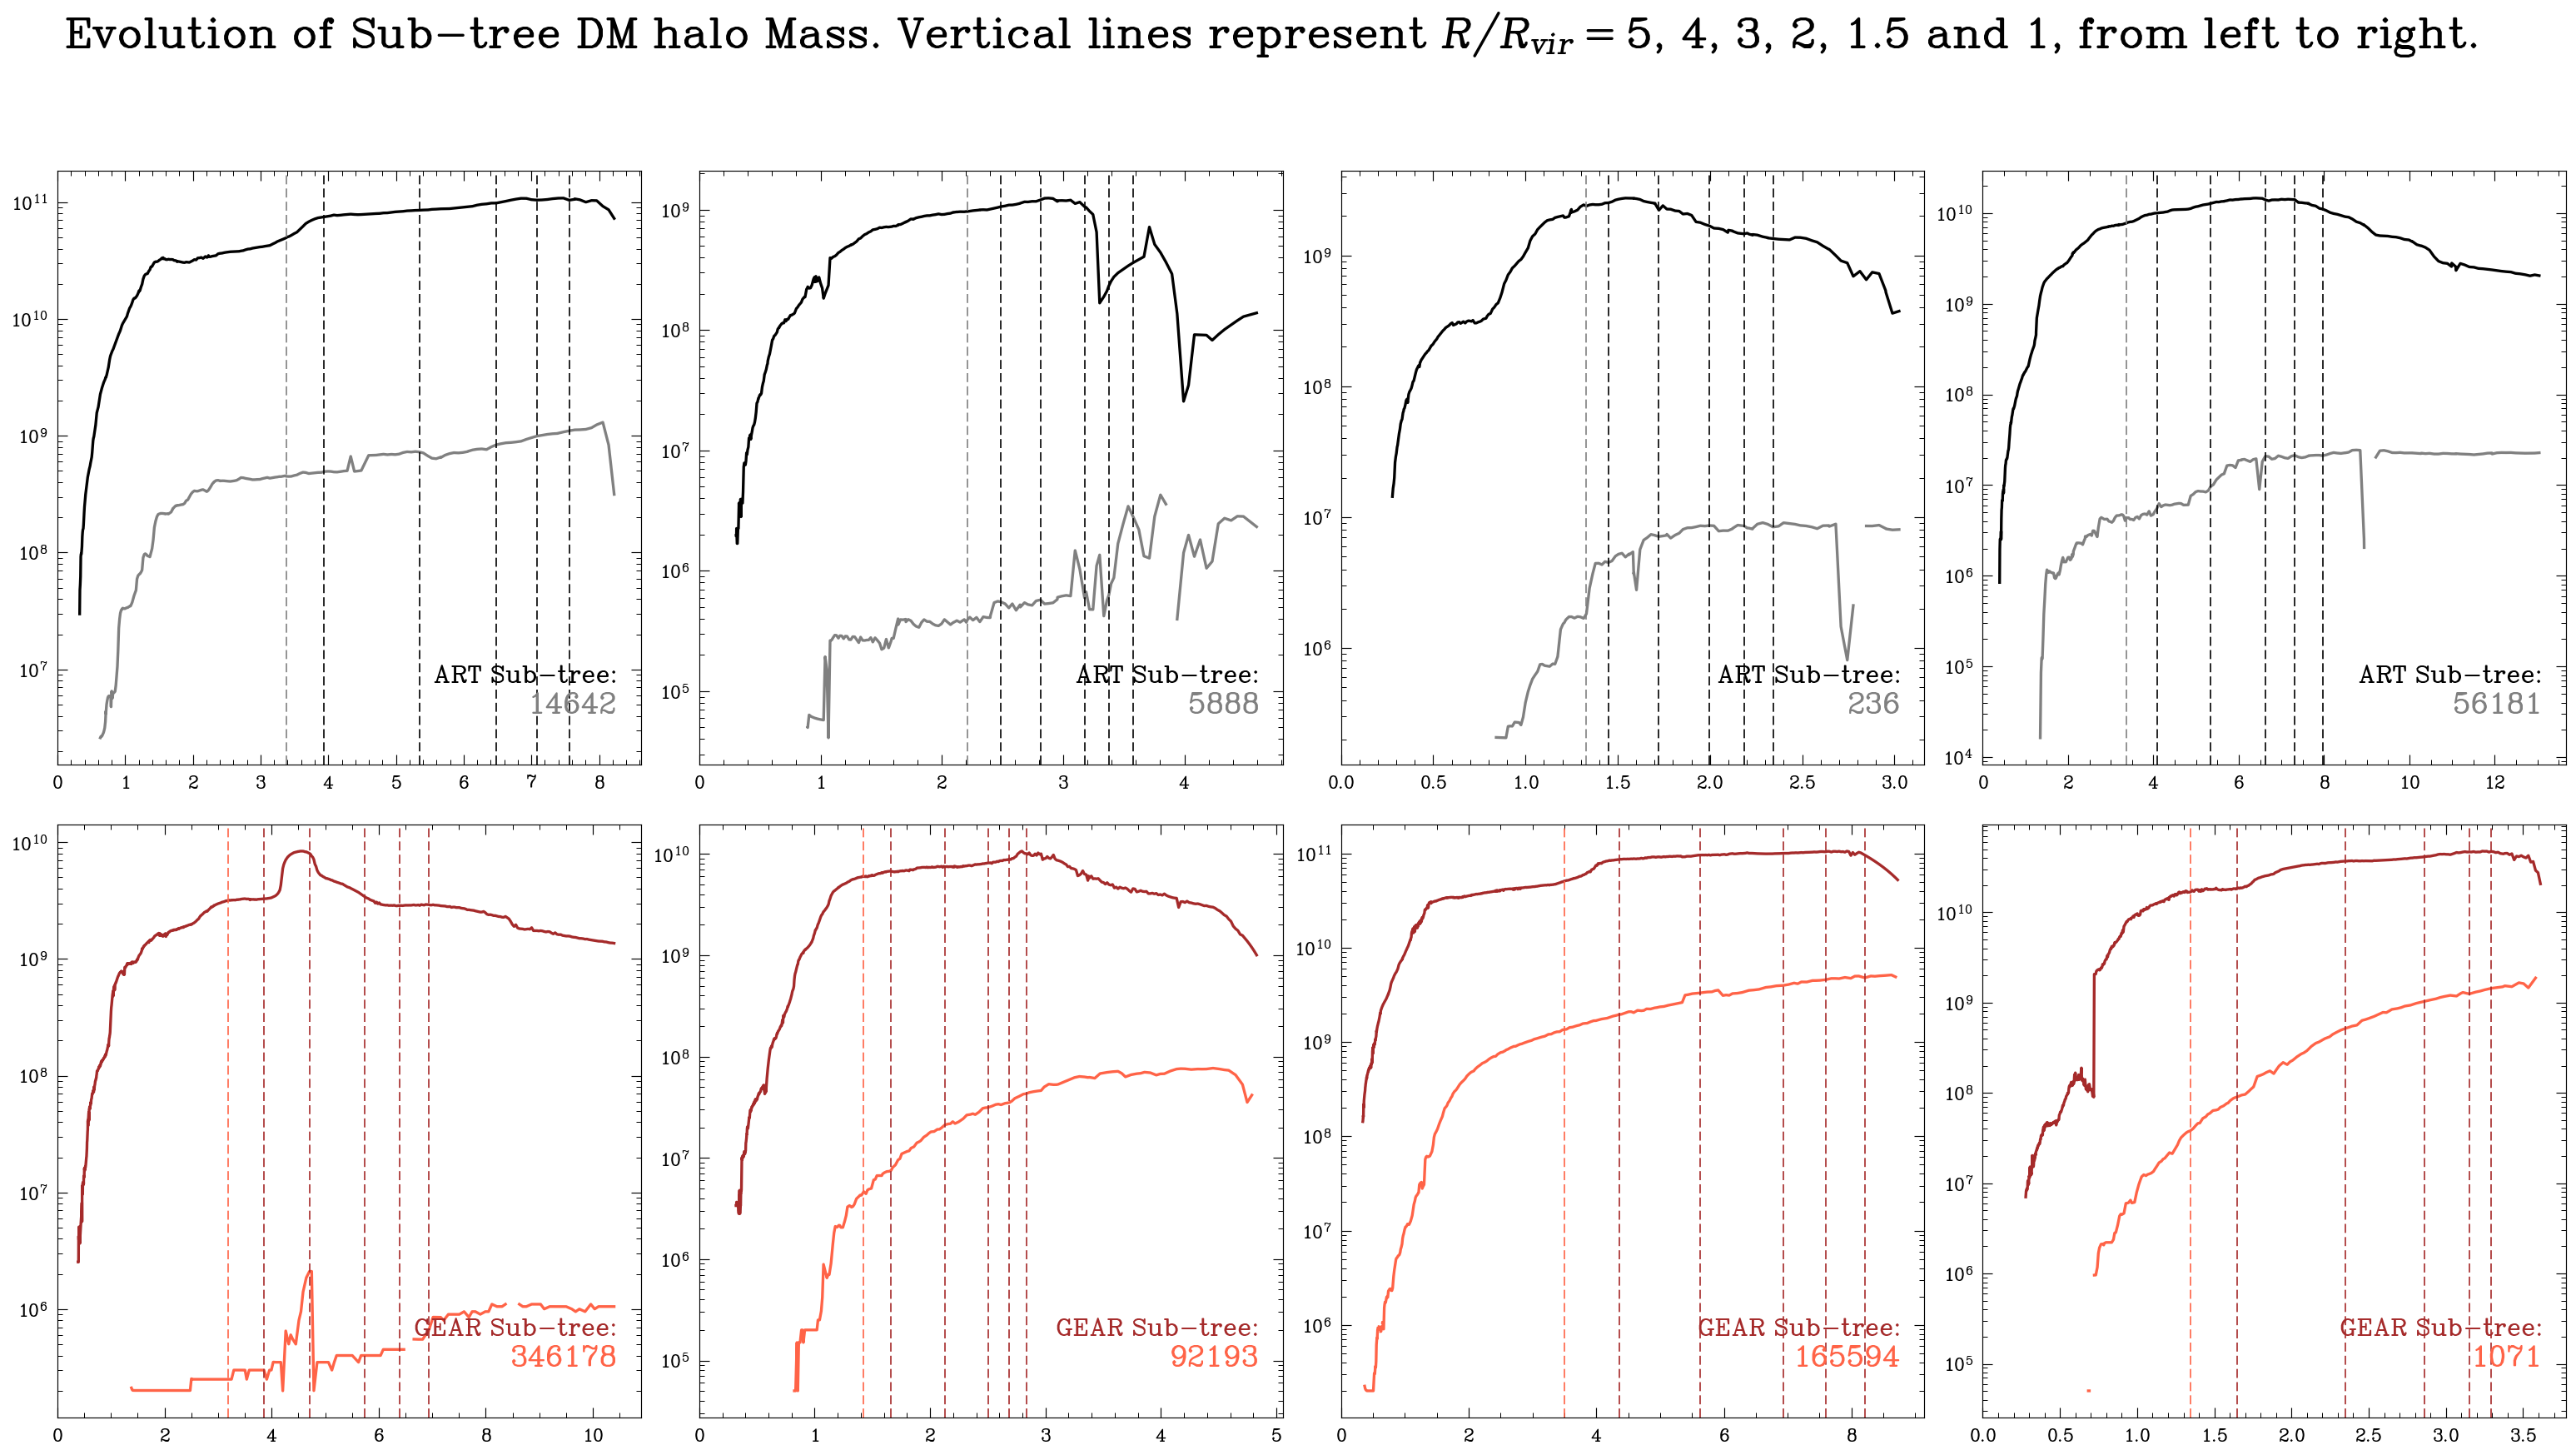

In [25]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(2*1.8*9,1.8*9))
    

fig.suptitle(r"Evolution of Sub-tree DM halo Mass. Vertical lines represent $R/R_{vir}=$5, 4, 3, 2, 1.5 and 1, from left to right.", fontsize=37)



gs = gridspec.GridSpec(2, 4, wspace=0.1, hspace=0.1)

axART = [
    fig.add_subplot(gs[0]), 
    fig.add_subplot(gs[1]), 
    fig.add_subplot(gs[2]), 
    fig.add_subplot(gs[3])
]

axGEAR = [
    fig.add_subplot(gs[4]), 
    fig.add_subplot(gs[5]), 
    fig.add_subplot(gs[6]), 
    fig.add_subplot(gs[7])
]


i=0
for subtree in selected_subids_ART:
    branch = completeART[completeART["Sub_tree_id"] == subtree].sort_values("Time")
    branch_s = cstars[cstars["Sub_tree_id"] == subtree].sort_values("Time")

    axART[i].plot(branch['Time'], branch['mass'], lw=2)
    axART[i].plot(branch_s['Time'], branch_s['stellar_mass'], lw=2, c="gray")
    axART[i].set_yscale("log")
    axART[i].set_xlim(0,)




    axART[i].text(0.96, 0.15 ,"ART Sub-tree:", fontsize=21, color="black", transform=axART[i].transAxes, ha="right", va="center")
    axART[i].text(0.96, 0.1 ,str(int(subtree)), fontsize=25, color="gray", transform=axART[i].transAxes, ha="right", va="center")

    col = ["black", "black", "black", "black", "black", "gray"]
    rrvir_time = candidates[candidates["Sub_tree_id"] == subtree]["Time"].values
    rrvir_masses = candidates[candidates["Sub_tree_id"] == subtree]["mass"].values
    for r, m, c in zip(rrvir_time, rrvir_masses, col):
        axART[i].axvline(r, color=c, ls="--", lw=1)



    i += 1




i=0
for subtree in selected_subids_GEAR:
    branch = completeGEAR[completeGEAR["Sub_tree_id"] == subtree].sort_values("Time")
    branch_s = cstars2[cstars2["Sub_tree_id"] == subtree].sort_values("Time")

    axGEAR[i].plot(branch['Time'], branch['mass'], color="brown", lw=2)
    axGEAR[i].plot(branch_s['Time'], branch_s['stellar_mass'], lw=2, c="tomato")
    axGEAR[i].set_yscale("log")
    axGEAR[i].set_xlim(0,)



    axGEAR[i].text(0.96, 0.15 ,"GEAR Sub-tree:", fontsize=21, color="brown", transform=axGEAR[i].transAxes, ha="right", va="center")
    axGEAR[i].text(0.96, 0.1 ,str(int(subtree)), fontsize=25, color="tomato", transform=axGEAR[i].transAxes, ha="right", va="center")

    col = ["brown", "brown", "brown", "brown", "brown", "tomato"]
    rrvir_time = candidates2[candidates2["Sub_tree_id"] == subtree]["Time"].values
    for r, c in zip(rrvir_time, col):
        axGEAR[i].axvline(r, color=c, ls="--", lw=1)

    
    i += 1

plt.savefig(f"figs/mass_evol.png")

### Sobras de stan y arviz

In [19]:
arviz.plot_pair(arfit, var_names=["beta0","beta1","sigma","nu"],
                marginals=True, kind=['scatter', 'hexbin'], divergences=True, colorbar=None, 
                point_estimate="mean", figsize=(15,15), scatter_kwargs={'s':3, 'zorder':-1, 'color': cmap.get_under()}, hexbin_kwargs={'cmap': cmap, 'mincnt':100}, gridsize=30)

NameError: name 'arviz' is not defined

array([[<AxesSubplot:ylabel='beta0'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='beta1'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='sigma'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='beta0', ylabel='nu'>,
        <AxesSubplot:xlabel='beta1'>, <AxesSubplot:xlabel='sigma'>,
        <AxesSubplot:xlabel='nu'>]], dtype=object)

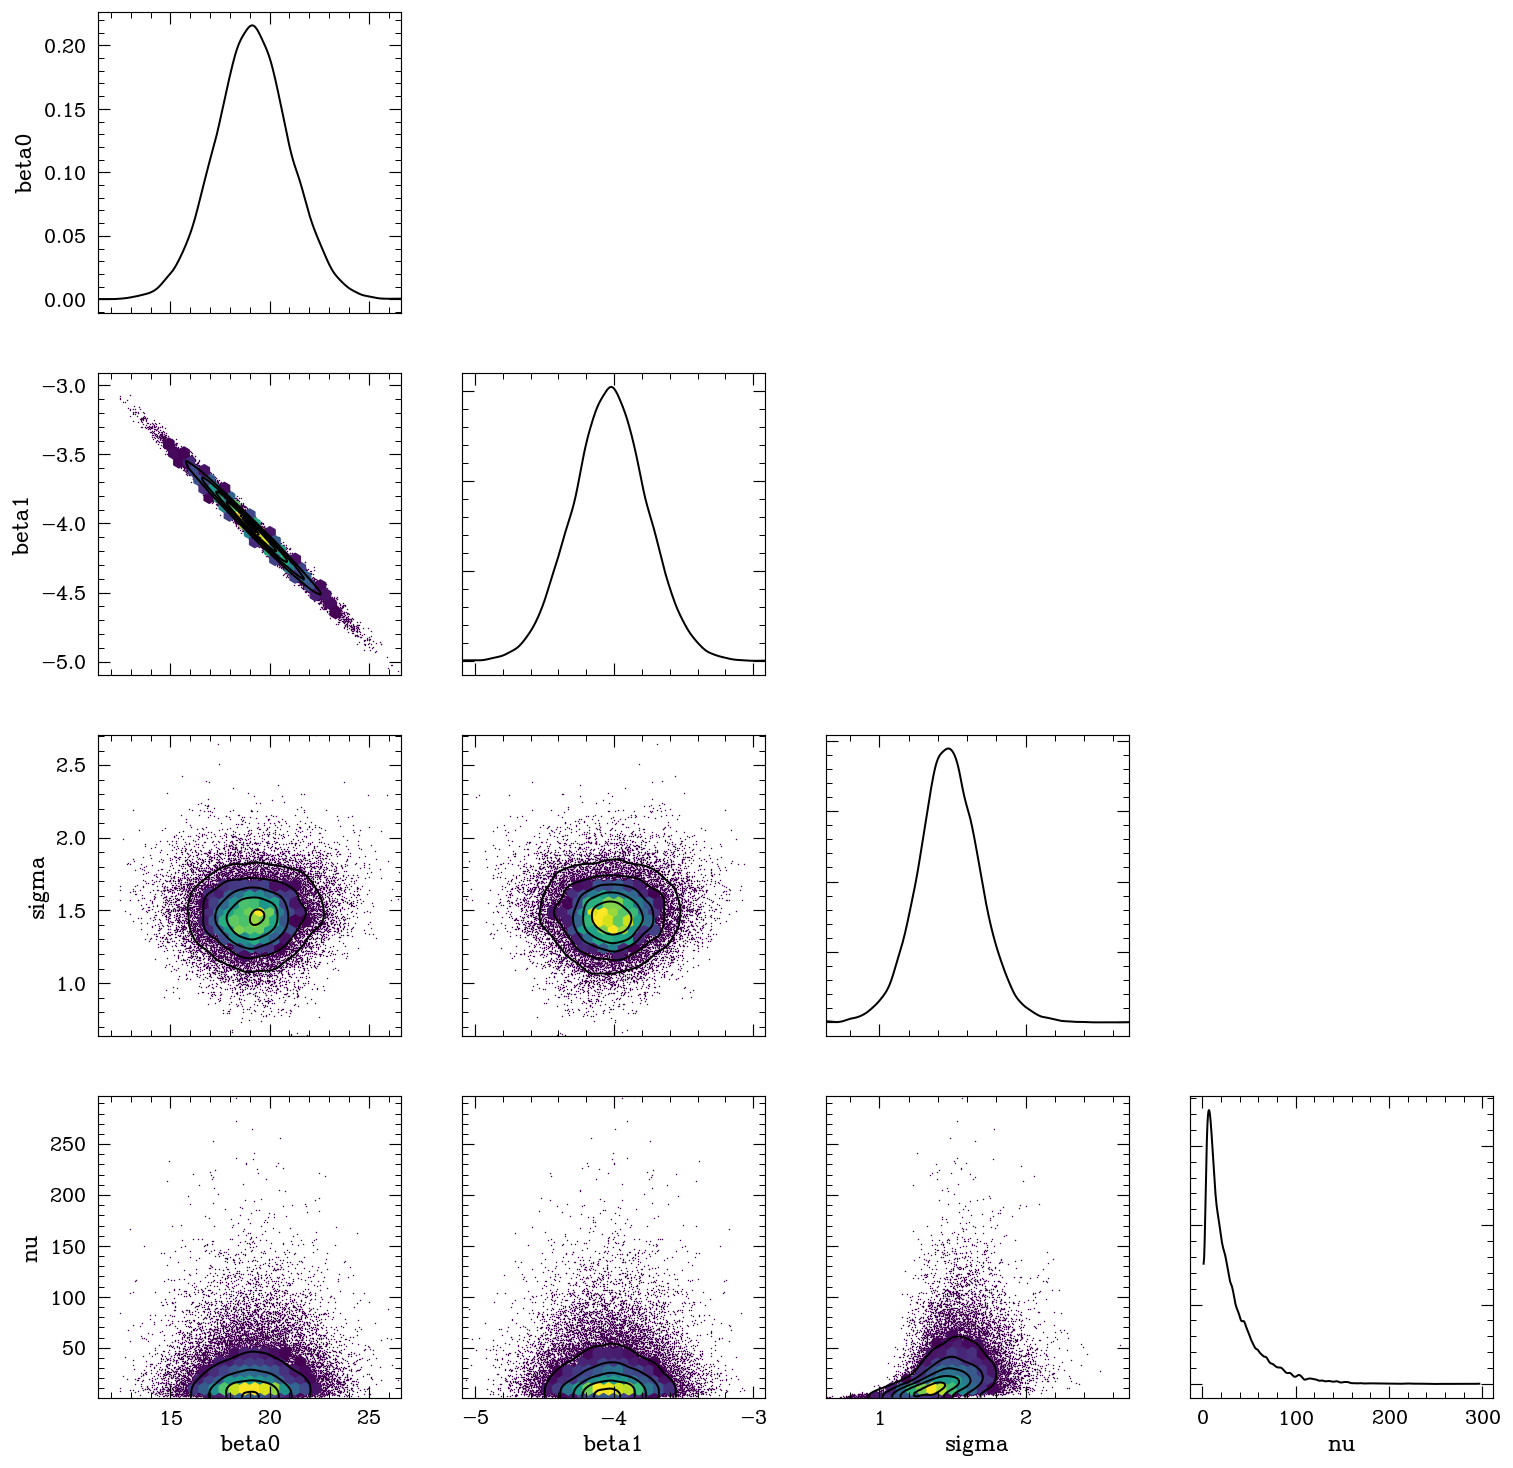

In [165]:
arviz.plot_pair(
    arfit, 
    var_names=["beta0", "beta1", "sigma", "nu"],
    marginals=True,
    kind=['kde','hexbin', 'scatter'], 
    divergences=True,
    #point_estimate="mean",
    figsize=(15, 15),
    kde_kwargs={'contour_kwargs': {'levels': 5, 
                                   'colors': ['none', 'black', 'black', 'black', 'black', 'black']
                                  },
                'fill_last': False,
                'quantiles':[0.01, 0.1, 0.2]
               },
    scatter_kwargs={'s': 3, 'zorder': -1, 'color': cm.viridis.get_under()},
    hexbin_kwargs={'cmap': cm.viridis, 'mincnt':100}, 
    gridsize=30
)